In [1]:
# Importing libraries 
import numpy as np 
import pandas as pd

In [2]:
# Importing the visualization libraries 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Importing the model building libraries 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import r2_score 
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model 

In [4]:
# Importing the warning library 
import warnings 
warnings.filterwarnings("ignore") 

In [5]:
# Read the Dataset 
housing = pd.read_csv("train.csv") 
housing

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [6]:
# Checking the basic information 
housing.shape 
housing.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Finding Null values 
housing.isnull().sum()/housing.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


Data Cleaning


In [8]:
cols = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType2","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]

for features in cols: 
    housing[features].fillna("None",inplace=True) 
    housing.isnull().sum()/housing.shape[0]*100 

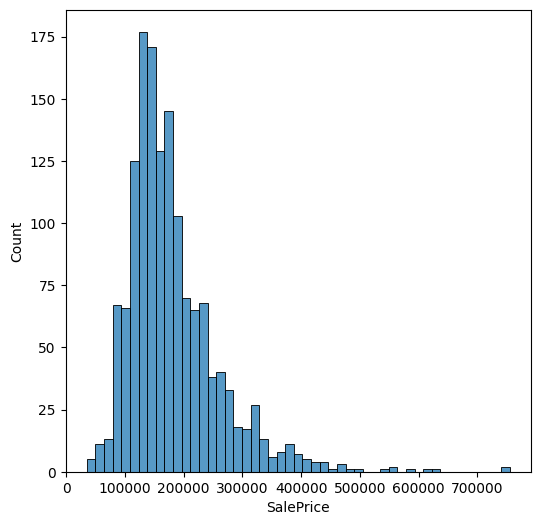

In [9]:
#Visualizing Data 
plt.figure(figsize=[6,6]) 
sns.histplot(housing['SalePrice']) 
plt.show()

In [10]:
# Calculating skew and kurt:
print(housing['SalePrice'].skew())
print(housing['SalePrice'].kurt())

1.8828757597682129
6.536281860064529


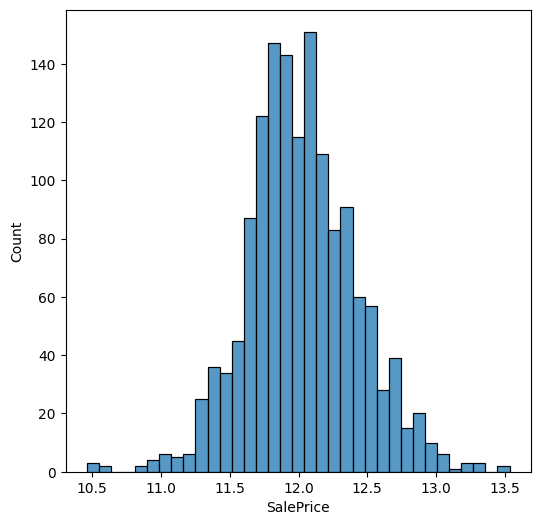

In [11]:
#Plotting on log scale: 
housing['SalePrice'] = np.log(housing['SalePrice']) 
plt.figure(figsize=[6,6]) 
sns.histplot(housing['SalePrice'])
plt.show()

In [12]:
print(housing['SalePrice'].skew())
print(housing['SalePrice'].kurt())

0.12133506220520406
0.8095319958036296


In [13]:
housing.drop("Id", axis=1, inplace=True) 

housing[['MSSubClass','OverallQual','OverallCond']] = housing[['MSSubClass','OverallQual','OverallCond']].astype('object') 
housing['MasVnrArea'] = pd.to_numeric(housing['MasVnrArea'], errors='coerce') 
housing['LotFrontage'] = pd.to_numeric(housing['LotFrontage'], errors='coerce')

In [14]:
null_cols = housing.columns[housing.isnull().any()] 
null_cols 

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtFinType1', 'Electrical',
       'GarageYrBlt'],
      dtype='object')

In [15]:
for i in null_cols: 
    if housing[i].dtype == np.float64 or housing[i].dtype == np.int64: 
        housing[i].fillna(housing[i].mean(), inplace=True) 
    else: 
        housing[i].fillna(housing[i].mode()[0], inplace=True)

In [16]:
#Checking for any null values if any 
housing.isnull().sum()/housing.shape[0]*100

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 80, dtype: float64


Exploratory Data Analysis


In [17]:
cat_cols = housing.select_dtypes(include='object').columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [18]:
num_cols = housing.select_dtypes(include=['int64','float64']).columns 
len(num_cols)

34

LotFrontage


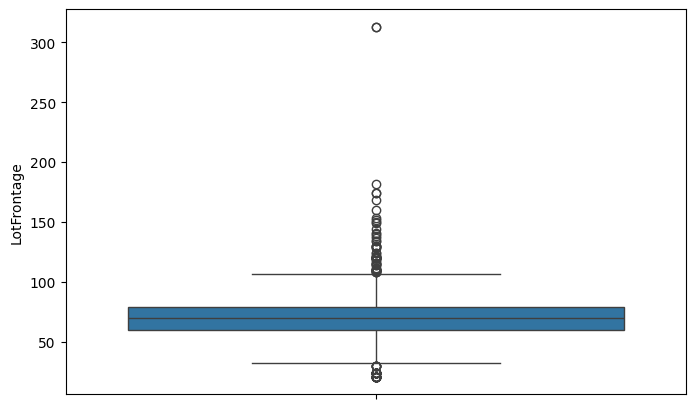

LotArea


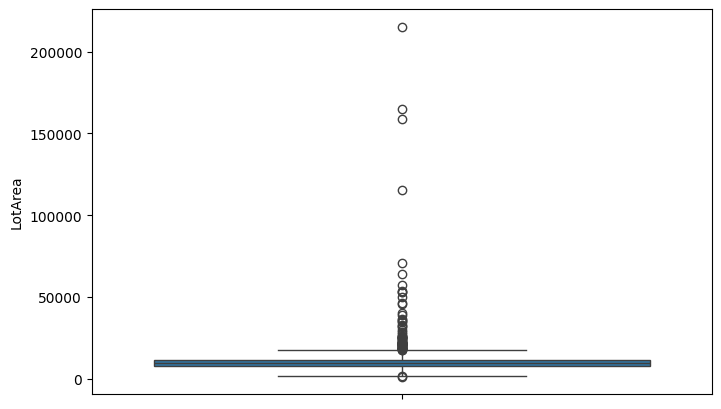

YearBuilt


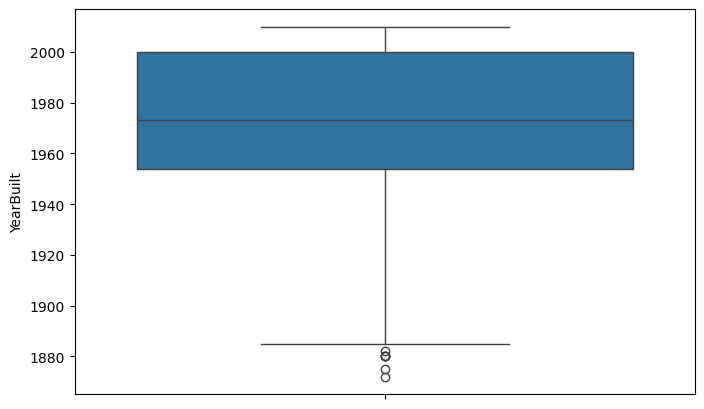

YearRemodAdd


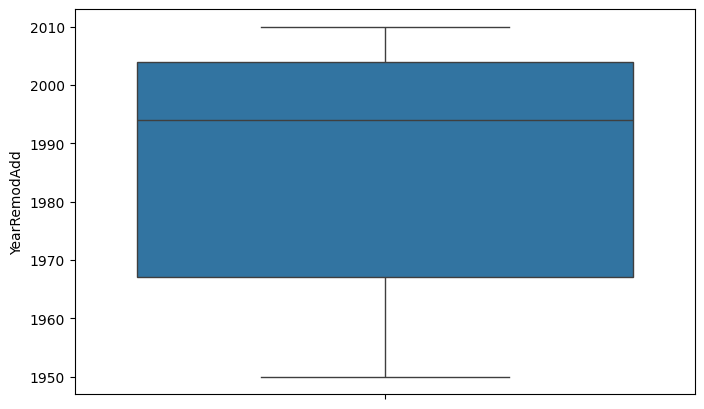

MasVnrArea


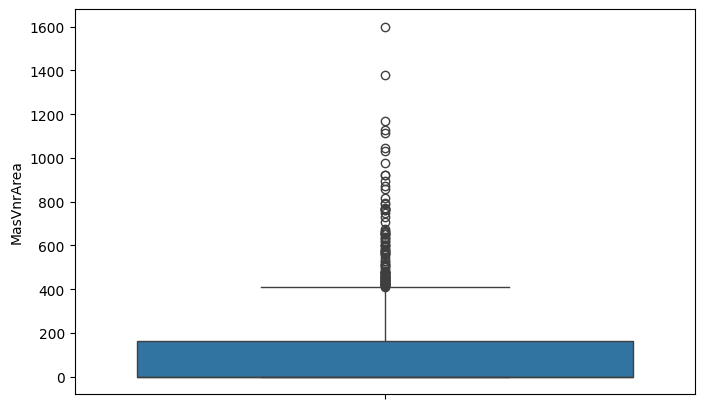

BsmtFinSF1


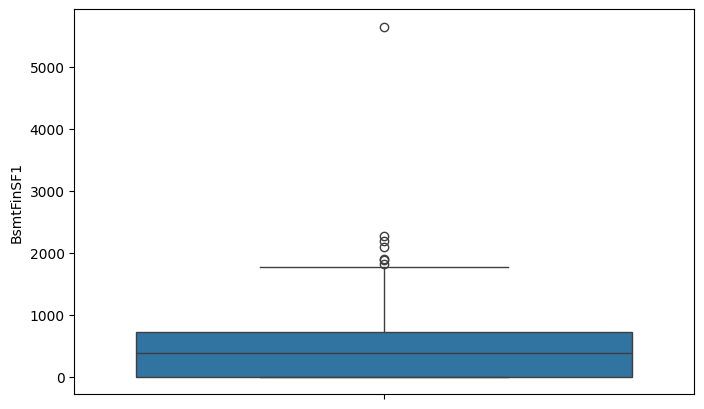

BsmtFinSF2


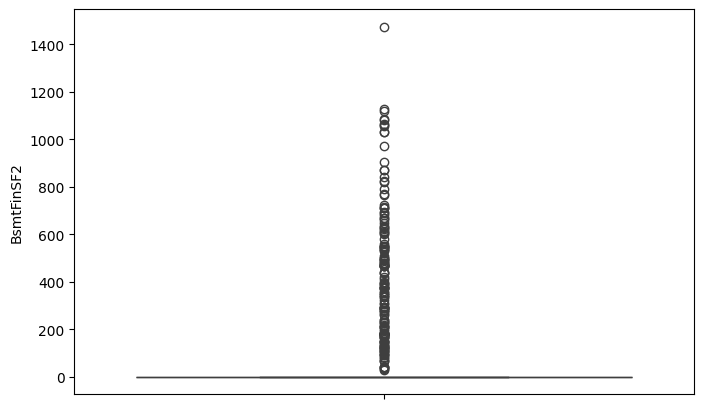

BsmtUnfSF


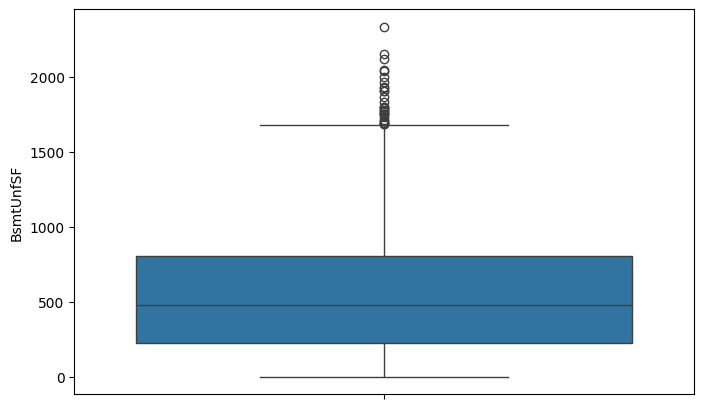

TotalBsmtSF


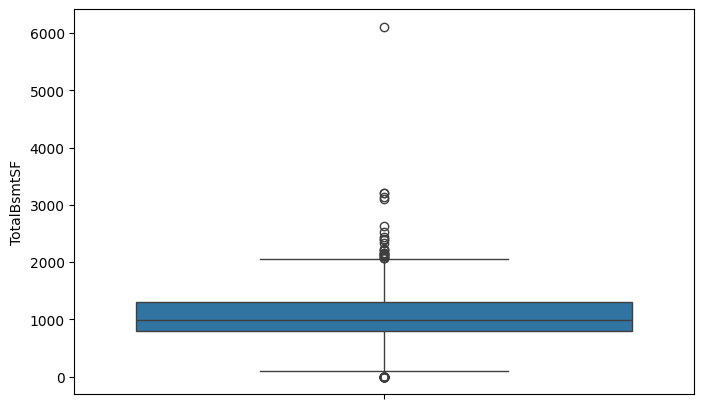

1stFlrSF


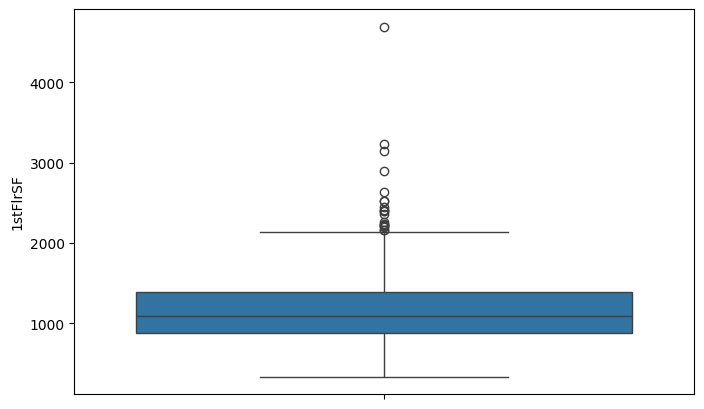

2ndFlrSF


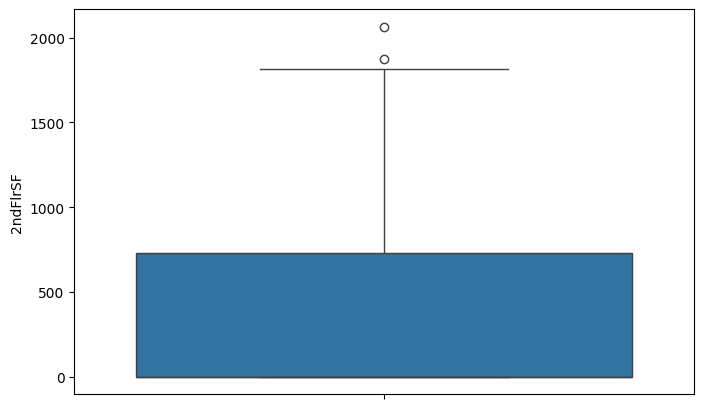

LowQualFinSF


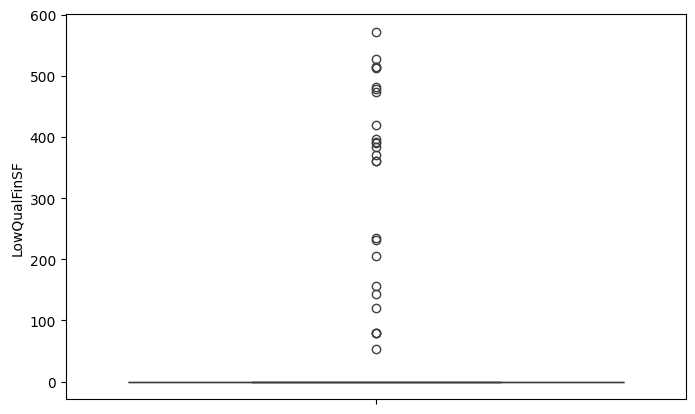

GrLivArea


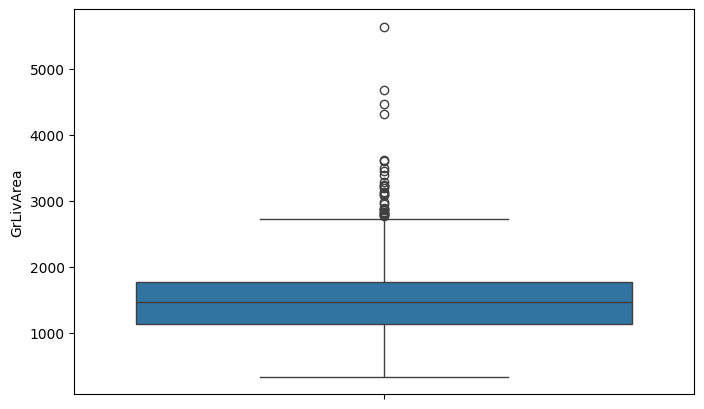

BsmtFullBath


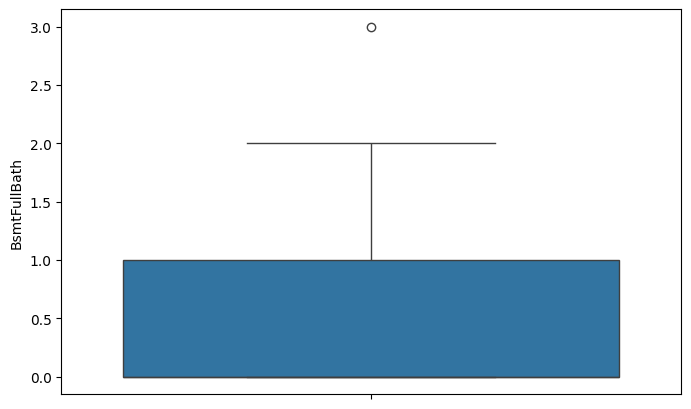

BsmtHalfBath


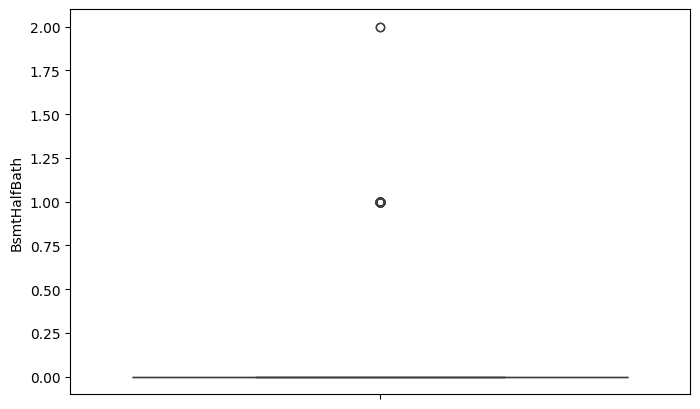

FullBath


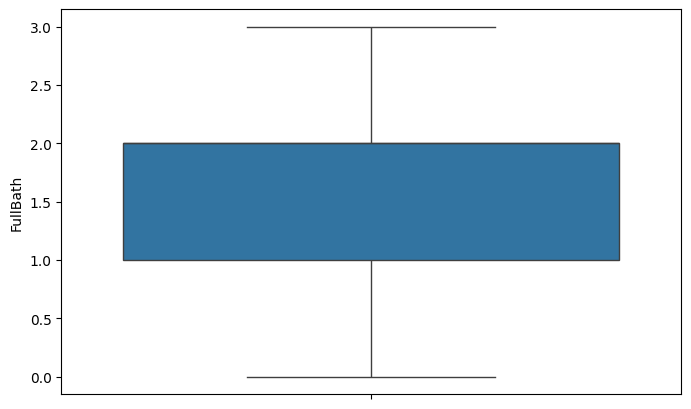

HalfBath


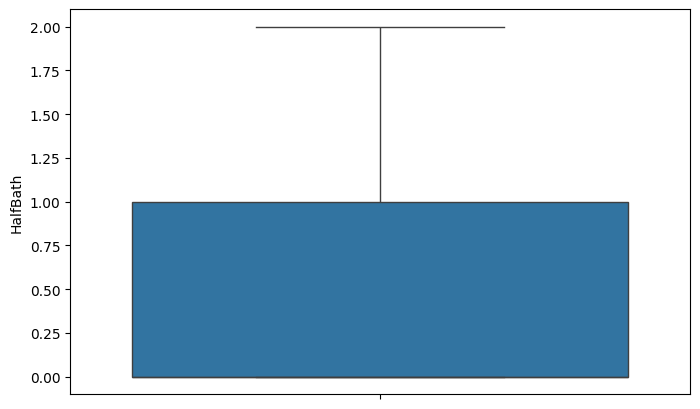

BedroomAbvGr


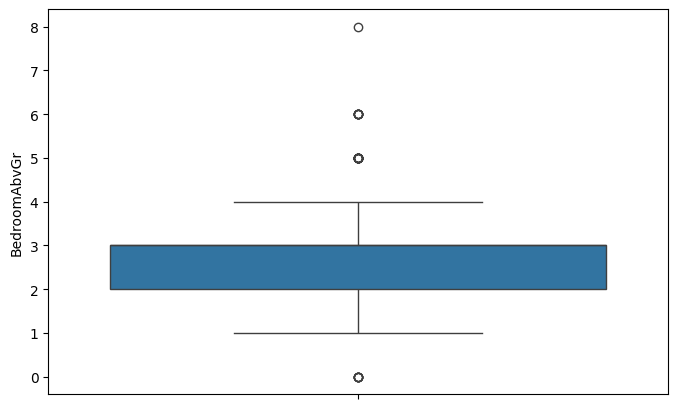

KitchenAbvGr


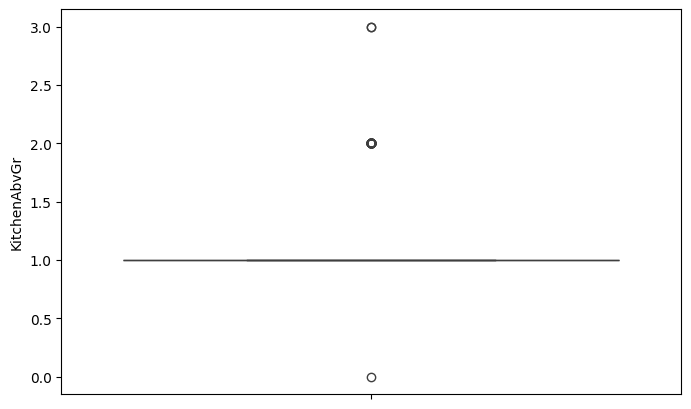

TotRmsAbvGrd


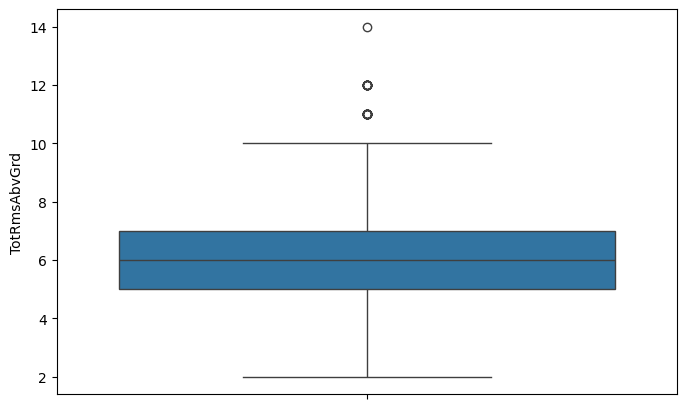

Fireplaces


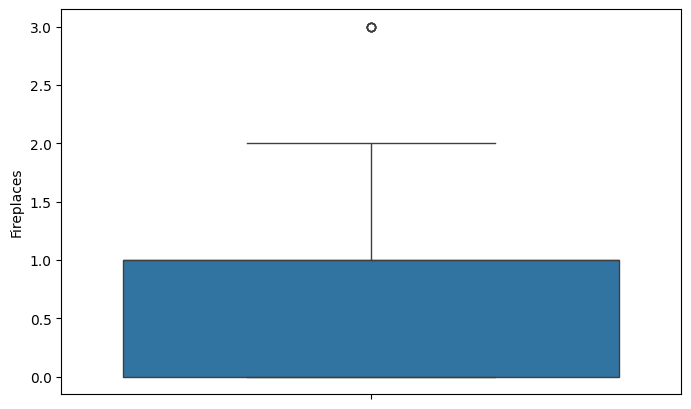

GarageYrBlt


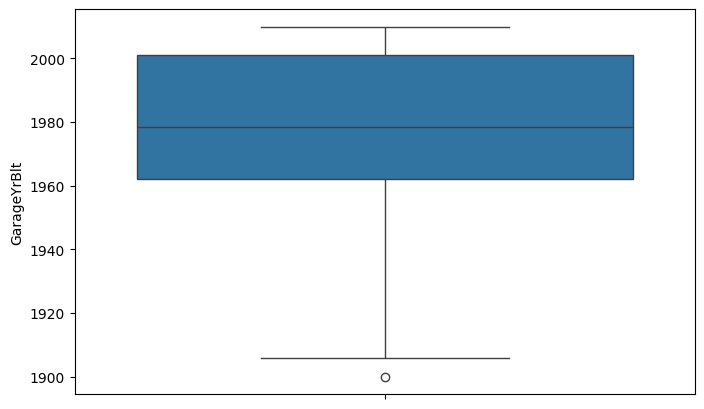

GarageCars


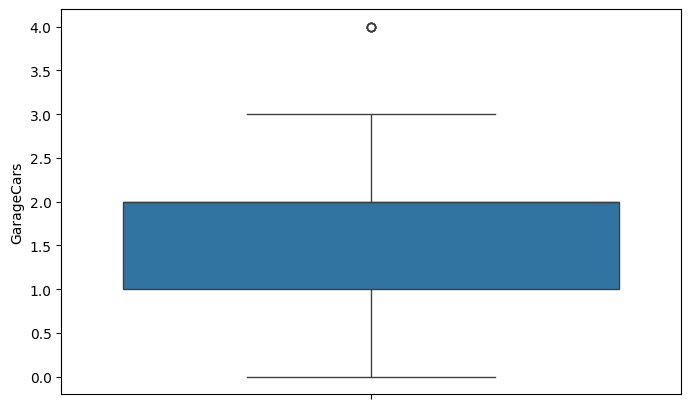

GarageArea


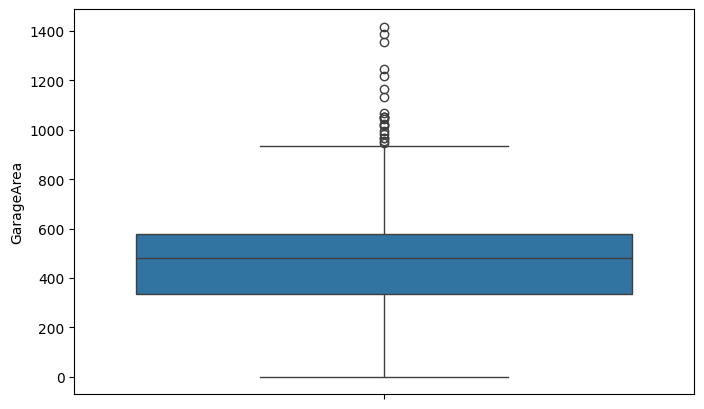

WoodDeckSF


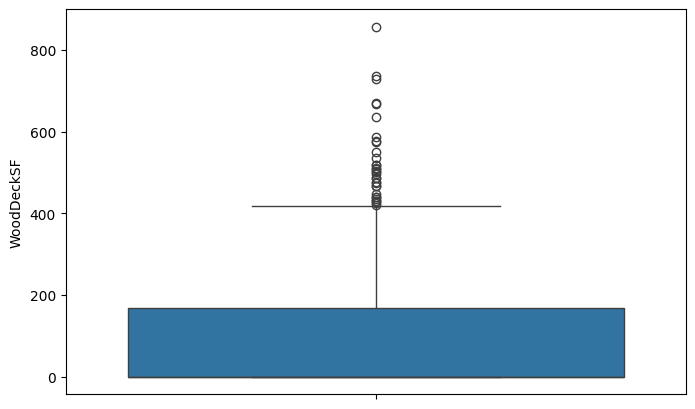

OpenPorchSF


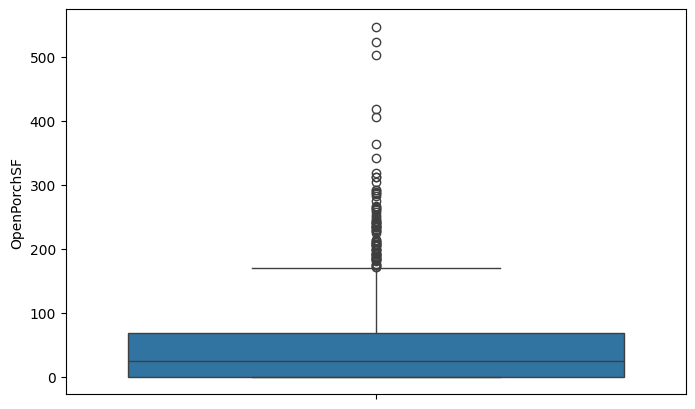

EnclosedPorch


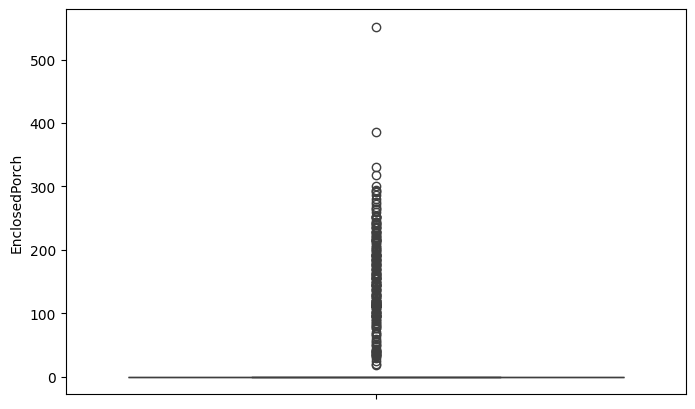

3SsnPorch


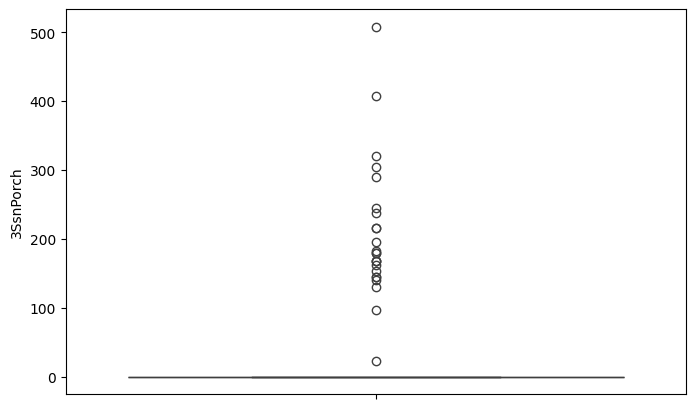

ScreenPorch


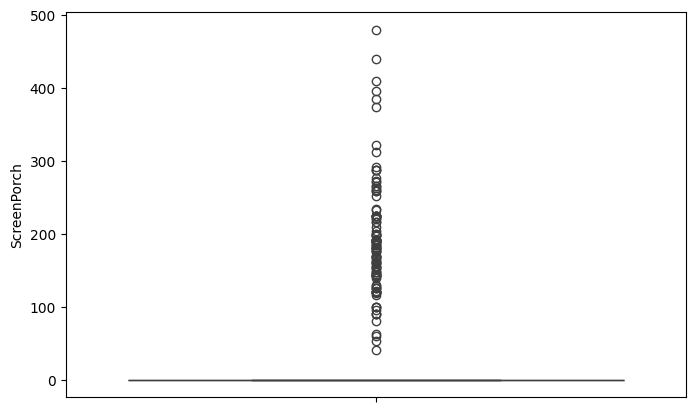

PoolArea


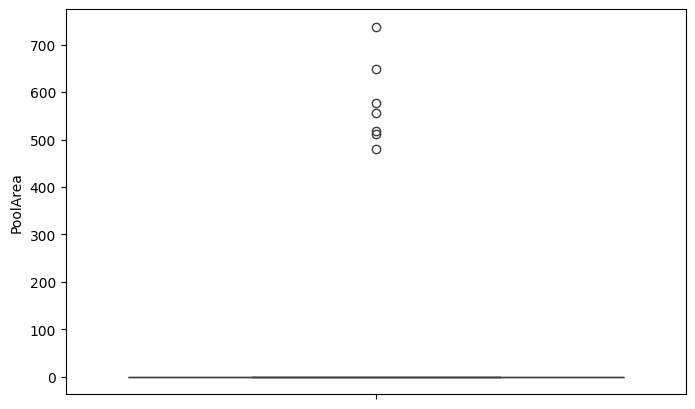

MiscVal


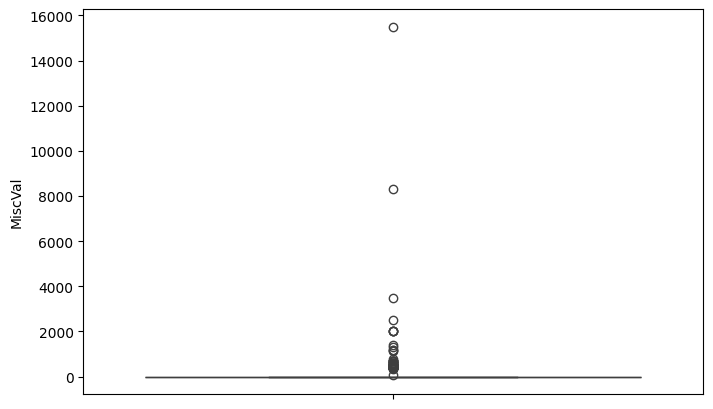

MoSold


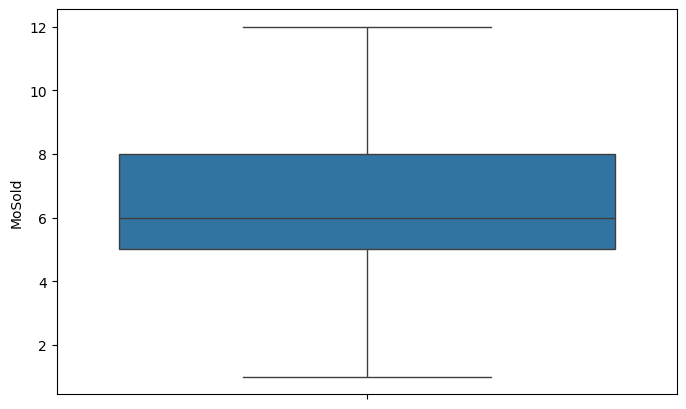

YrSold


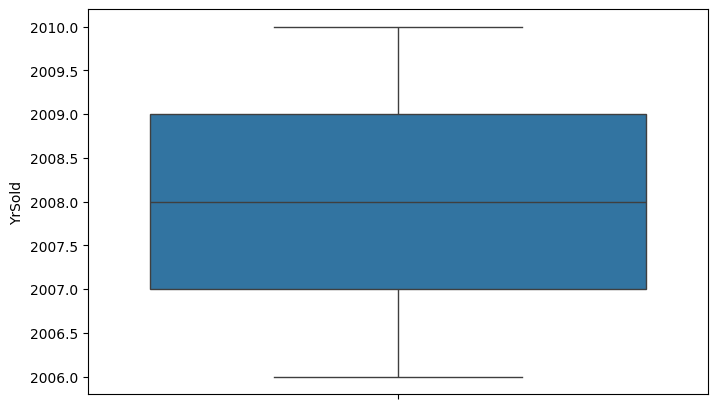

SalePrice


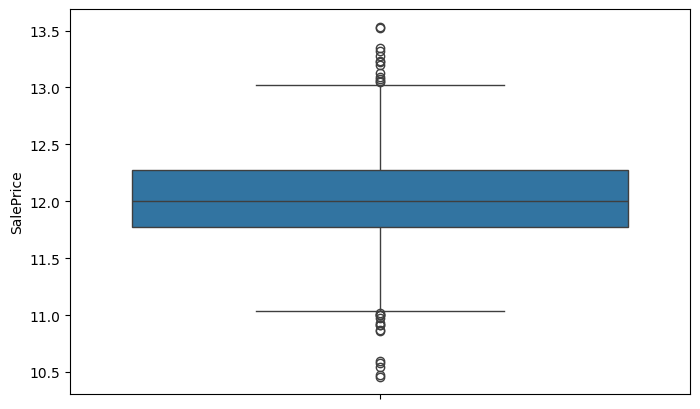

In [19]:
#Univariate Analysis 
for i in num_cols: 
   plt.figure(figsize=(8,5)) 
   print(i) 
   sns.boxplot(housing[i]) 
   plt.show()

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: proportion, dtype: float64


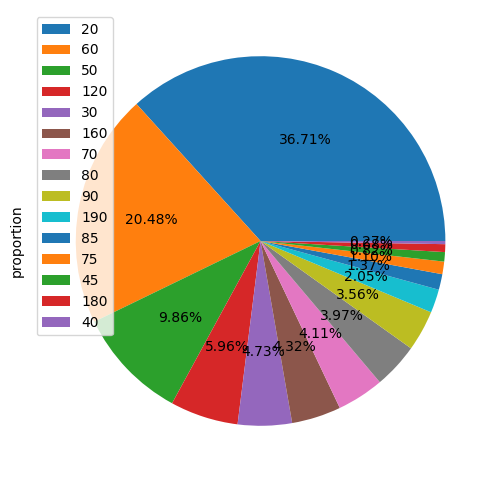

MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: proportion, dtype: float64


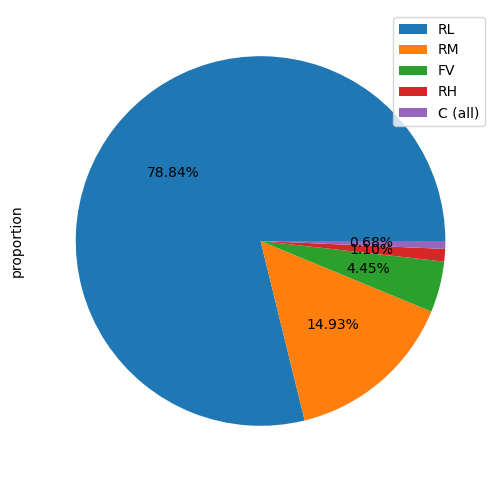

Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64


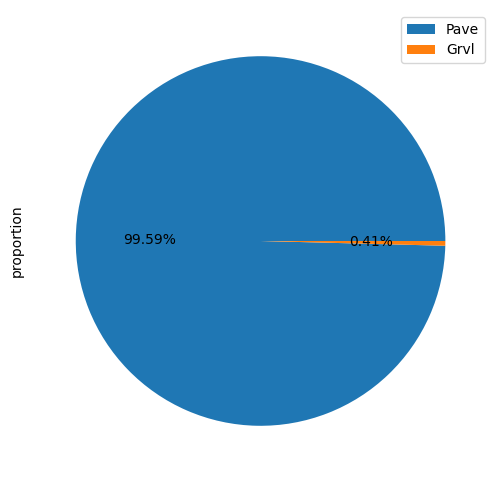

Alley
None    0.937671
Grvl    0.034247
Pave    0.028082
Name: proportion, dtype: float64


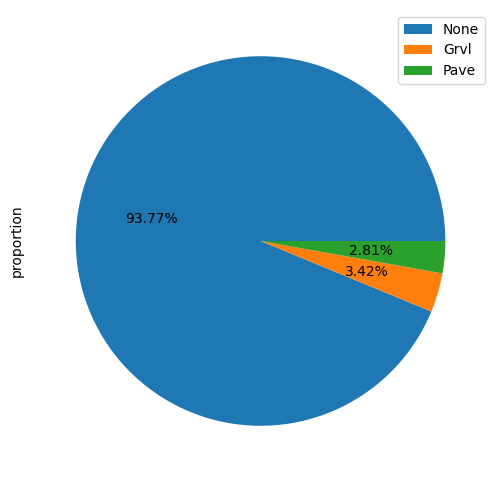

LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: proportion, dtype: float64


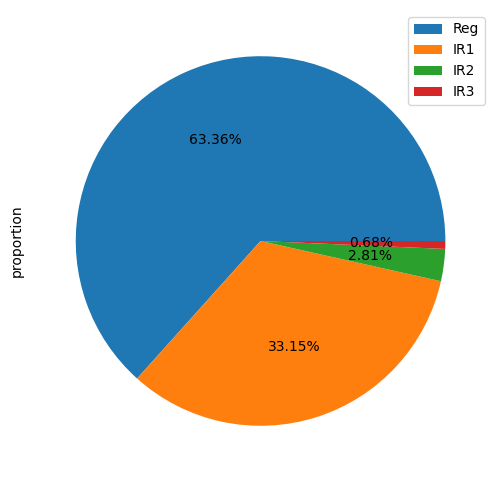

LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: proportion, dtype: float64


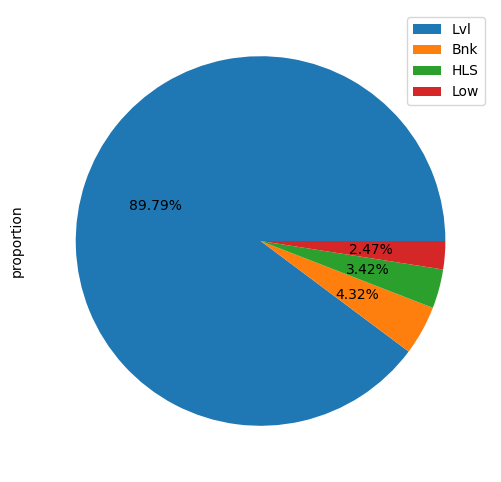

Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: proportion, dtype: float64


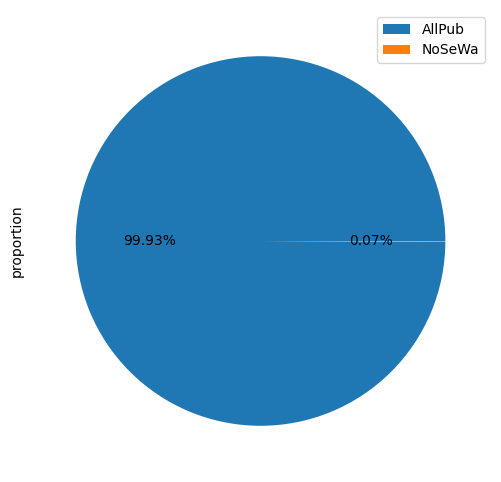

LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: proportion, dtype: float64


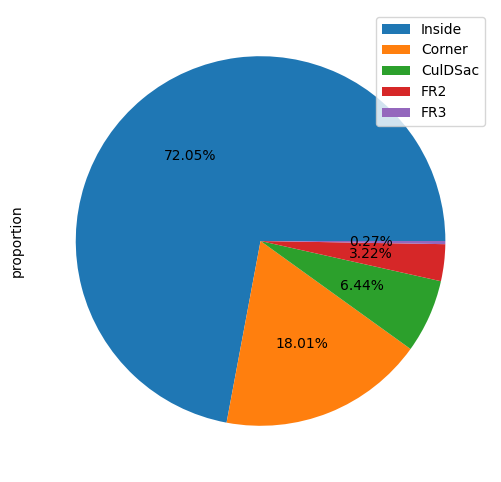

LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: proportion, dtype: float64


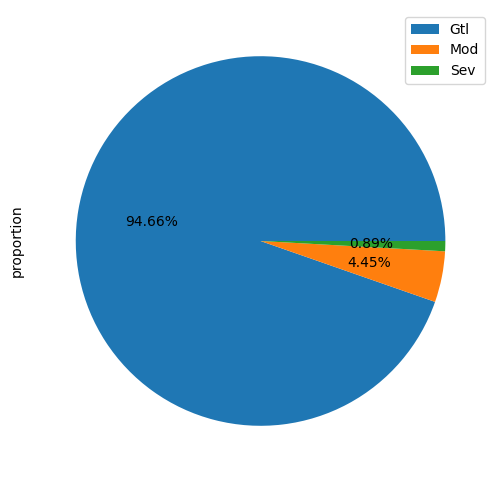

Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: proportion, dtype: float64


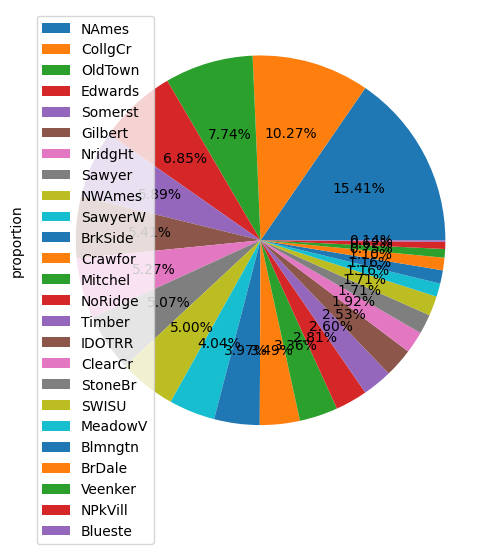

Condition1
Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.005479
RRNn      0.003425
RRNe      0.001370
Name: proportion, dtype: float64


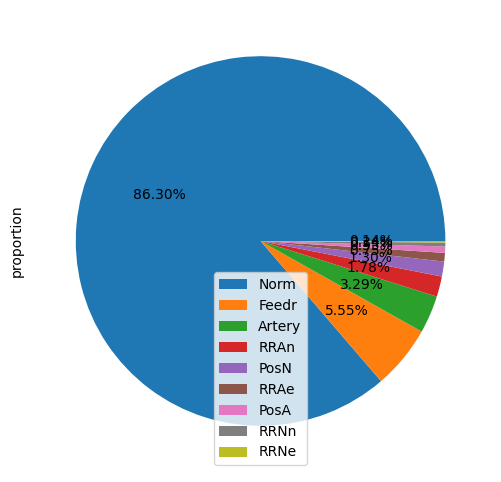

Condition2
Norm      0.989726
Feedr     0.004110
Artery    0.001370
RRNn      0.001370
PosN      0.001370
PosA      0.000685
RRAn      0.000685
RRAe      0.000685
Name: proportion, dtype: float64


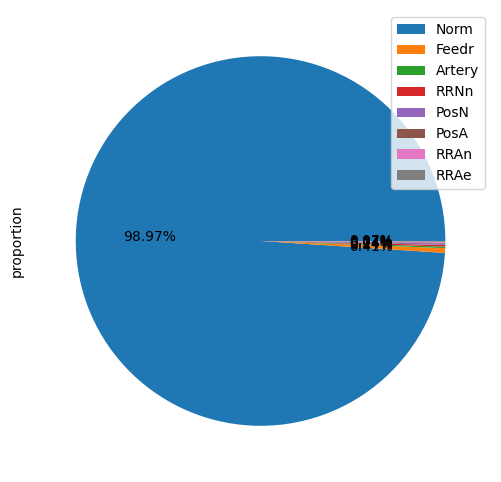

BldgType
1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: proportion, dtype: float64


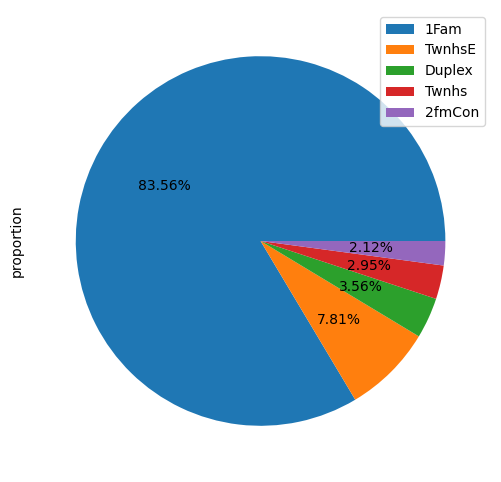

HouseStyle
1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: proportion, dtype: float64


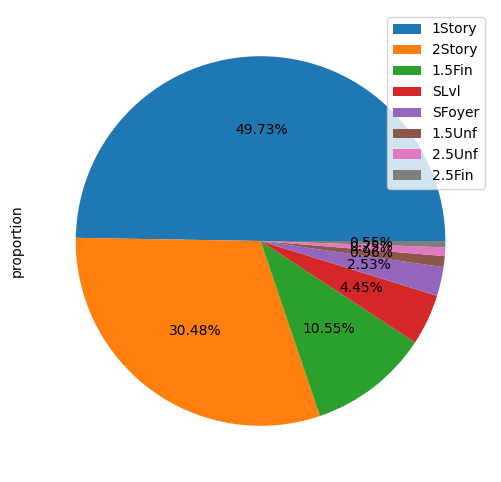

OverallQual
5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: proportion, dtype: float64


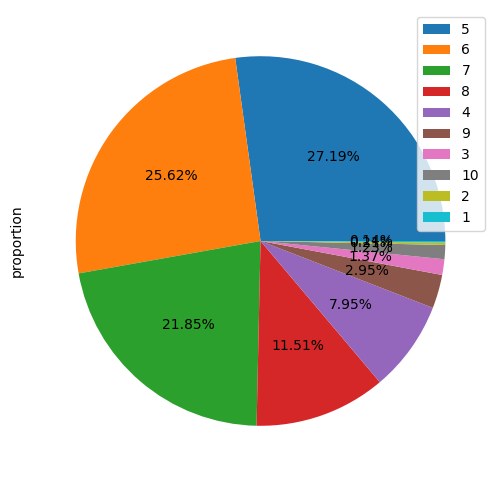

OverallCond
5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: proportion, dtype: float64


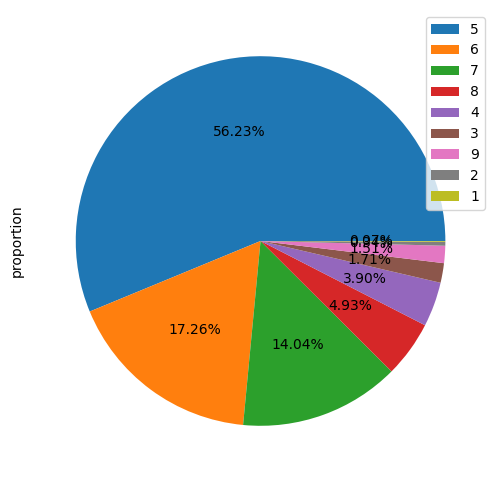

RoofStyle
Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: proportion, dtype: float64


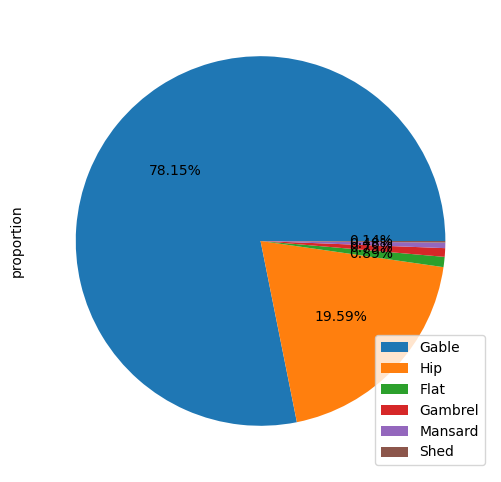

RoofMatl
CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
Metal      0.000685
Membran    0.000685
Roll       0.000685
ClyTile    0.000685
Name: proportion, dtype: float64


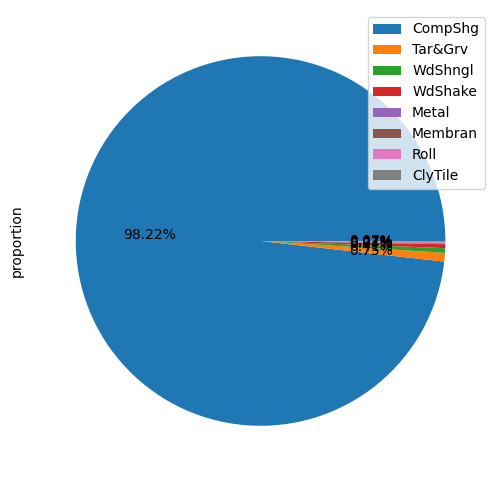

Exterior1st
VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
BrkComm    0.001370
Stone      0.001370
AsphShn    0.000685
ImStucc    0.000685
CBlock     0.000685
Name: proportion, dtype: float64


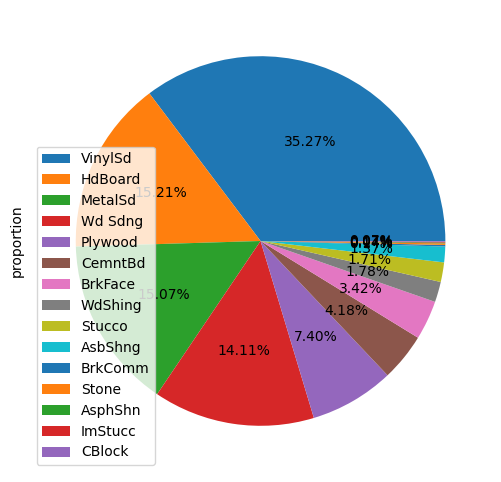

Exterior2nd
VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
Other      0.000685
CBlock     0.000685
Name: proportion, dtype: float64


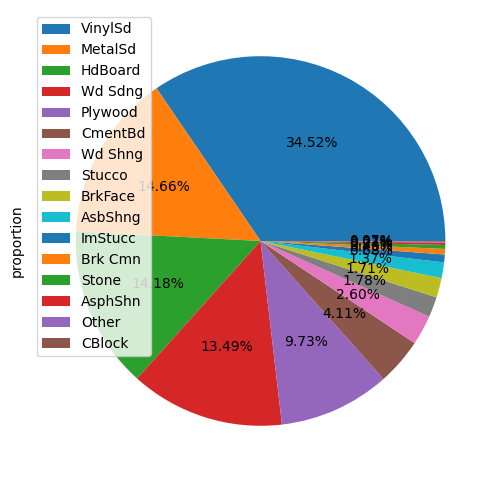

MasVnrType
BrkFace    0.902055
Stone      0.087671
BrkCmn     0.010274
Name: proportion, dtype: float64


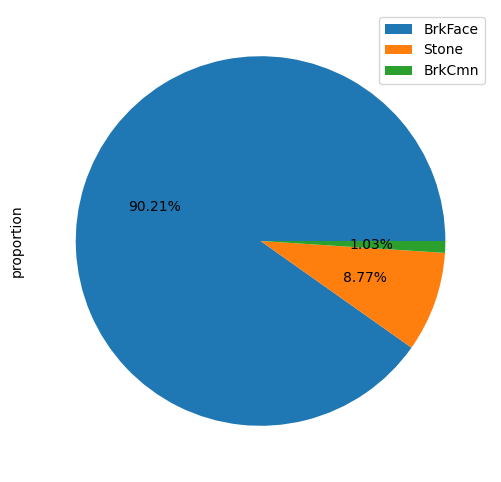

ExterQual
TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: proportion, dtype: float64


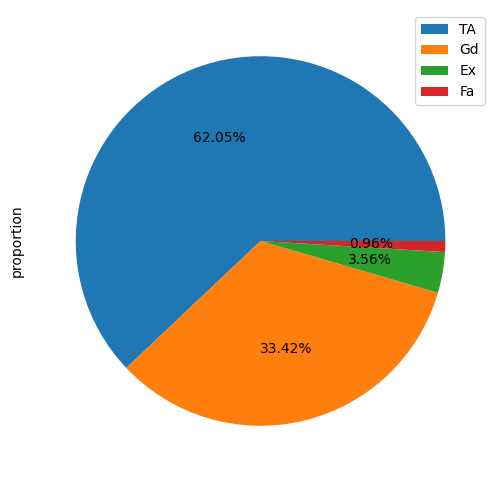

ExterCond
TA    0.878082
Gd    0.100000
Fa    0.019178
Ex    0.002055
Po    0.000685
Name: proportion, dtype: float64


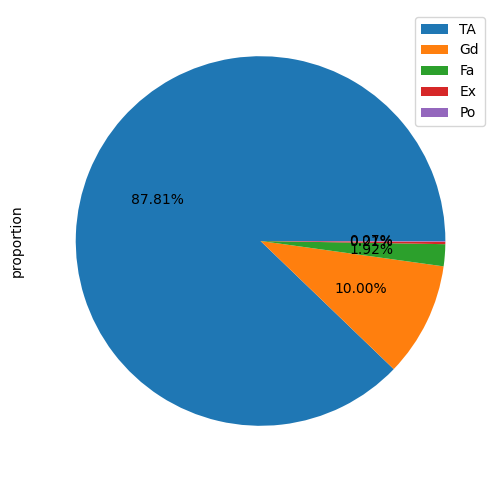

Foundation
PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: proportion, dtype: float64


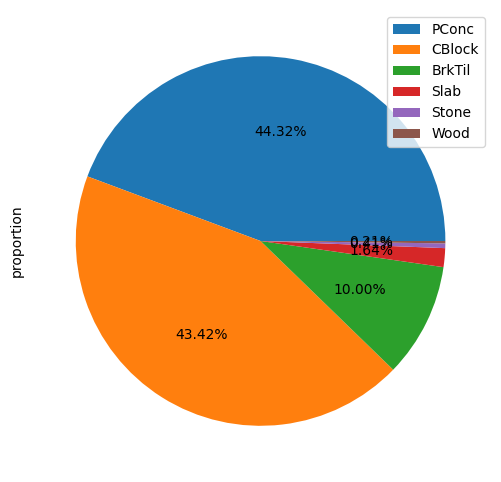

BsmtQual
TA      0.444521
Gd      0.423288
Ex      0.082877
None    0.025342
Fa      0.023973
Name: proportion, dtype: float64


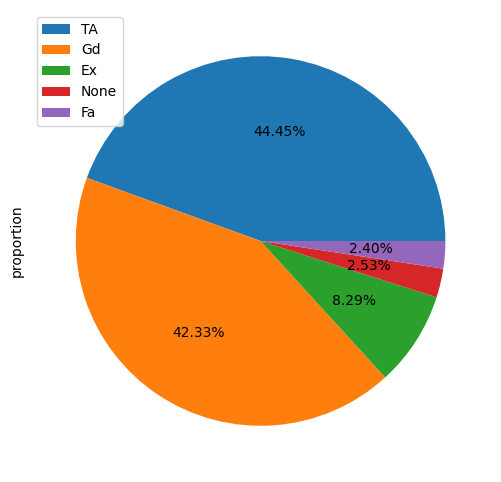

BsmtCond
TA      0.897945
Gd      0.044521
Fa      0.030822
None    0.025342
Po      0.001370
Name: proportion, dtype: float64


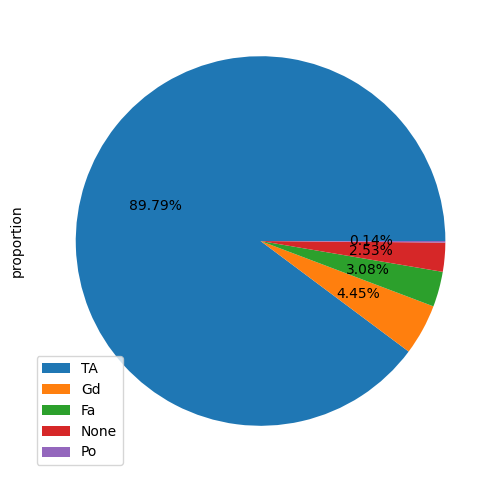

BsmtExposure
No      0.652740
Av      0.151370
Gd      0.091781
Mn      0.078082
None    0.026027
Name: proportion, dtype: float64


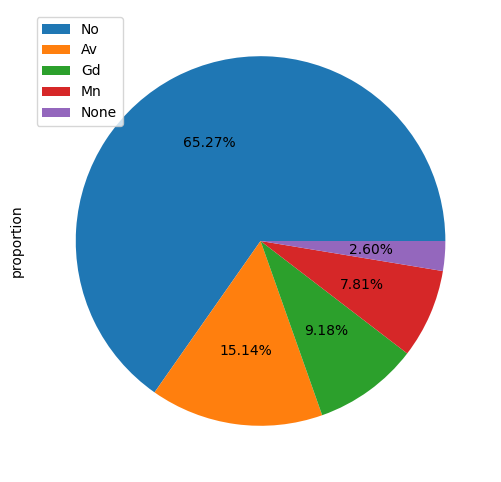

BsmtFinType1
Unf    0.319863
GLQ    0.286301
ALQ    0.150685
BLQ    0.101370
Rec    0.091096
LwQ    0.050685
Name: proportion, dtype: float64


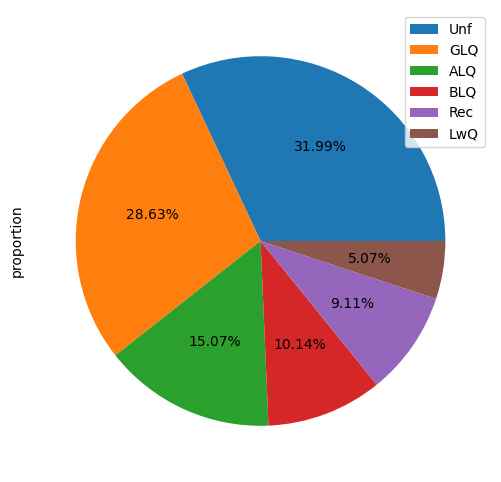

BsmtFinType2
Unf     0.860274
Rec     0.036986
LwQ     0.031507
None    0.026027
BLQ     0.022603
ALQ     0.013014
GLQ     0.009589
Name: proportion, dtype: float64


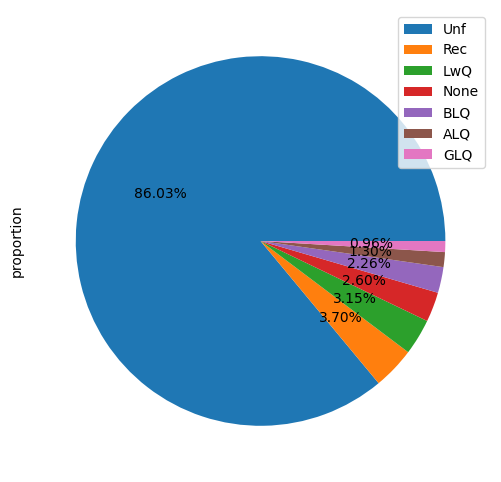

Heating
GasA     0.978082
GasW     0.012329
Grav     0.004795
Wall     0.002740
OthW     0.001370
Floor    0.000685
Name: proportion, dtype: float64


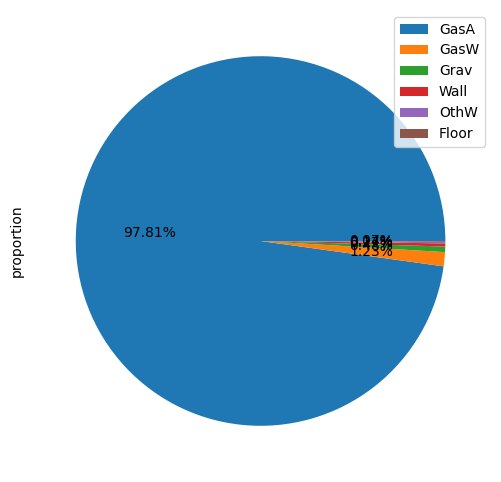

HeatingQC
Ex    0.507534
TA    0.293151
Gd    0.165068
Fa    0.033562
Po    0.000685
Name: proportion, dtype: float64


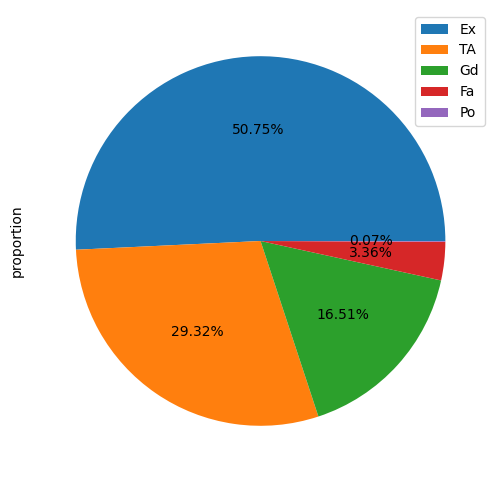

CentralAir
Y    0.934932
N    0.065068
Name: proportion, dtype: float64


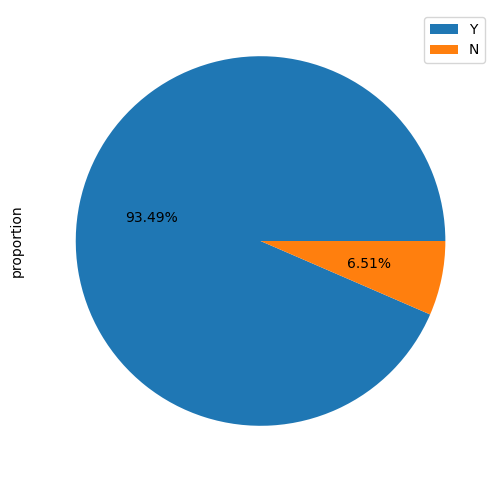

Electrical
SBrkr    0.914384
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
Name: proportion, dtype: float64


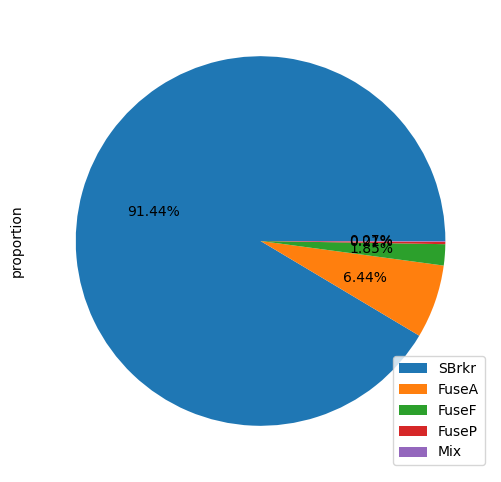

KitchenQual
TA    0.503425
Gd    0.401370
Ex    0.068493
Fa    0.026712
Name: proportion, dtype: float64


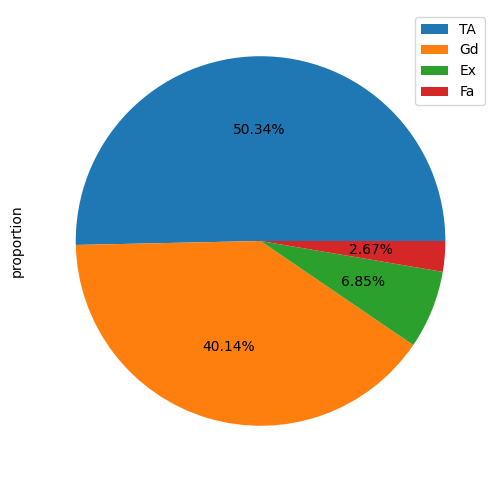

Functional
Typ     0.931507
Min2    0.023288
Min1    0.021233
Mod     0.010274
Maj1    0.009589
Maj2    0.003425
Sev     0.000685
Name: proportion, dtype: float64


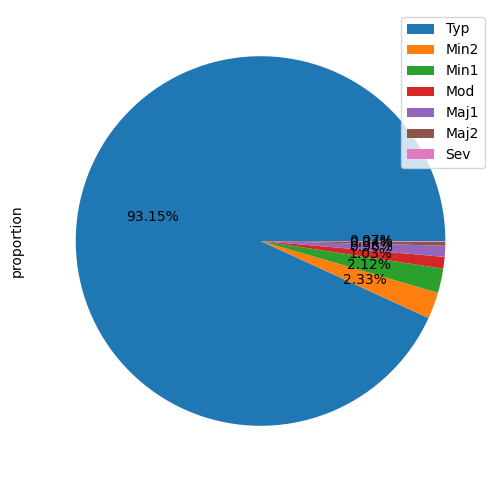

FireplaceQu
None    0.472603
Gd      0.260274
TA      0.214384
Fa      0.022603
Ex      0.016438
Po      0.013699
Name: proportion, dtype: float64


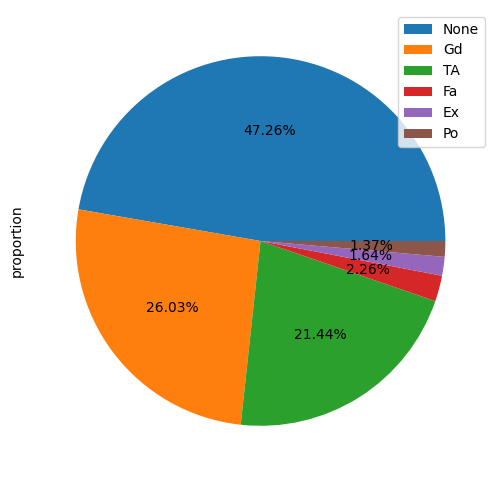

GarageType
Attchd     0.595890
Detchd     0.265068
BuiltIn    0.060274
None       0.055479
Basment    0.013014
CarPort    0.006164
2Types     0.004110
Name: proportion, dtype: float64


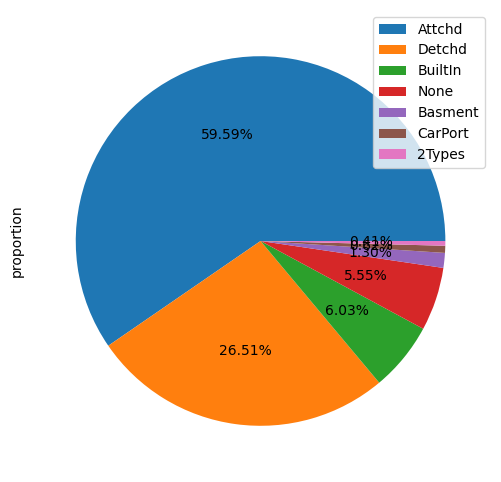

GarageFinish
Unf     0.414384
RFn     0.289041
Fin     0.241096
None    0.055479
Name: proportion, dtype: float64


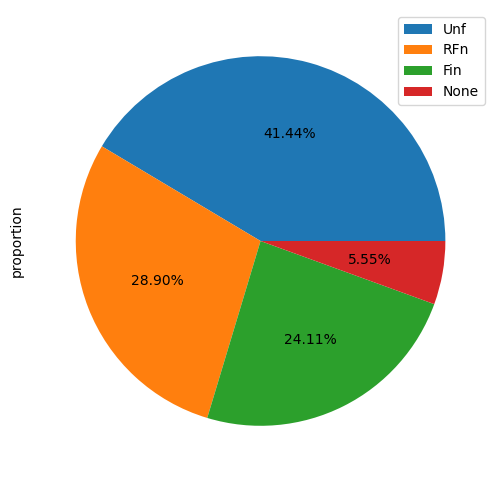

GarageQual
TA      0.897945
None    0.055479
Fa      0.032877
Gd      0.009589
Ex      0.002055
Po      0.002055
Name: proportion, dtype: float64


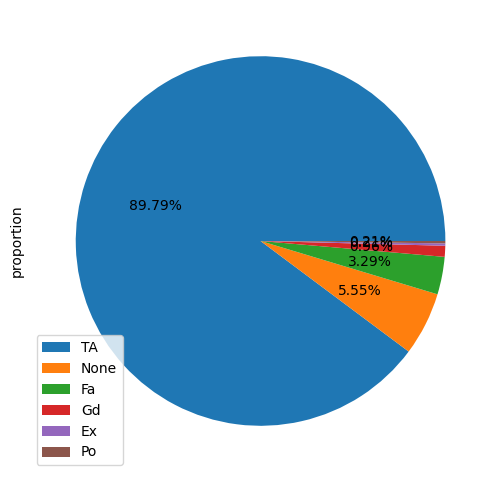

GarageCond
TA      0.908219
None    0.055479
Fa      0.023973
Gd      0.006164
Po      0.004795
Ex      0.001370
Name: proportion, dtype: float64


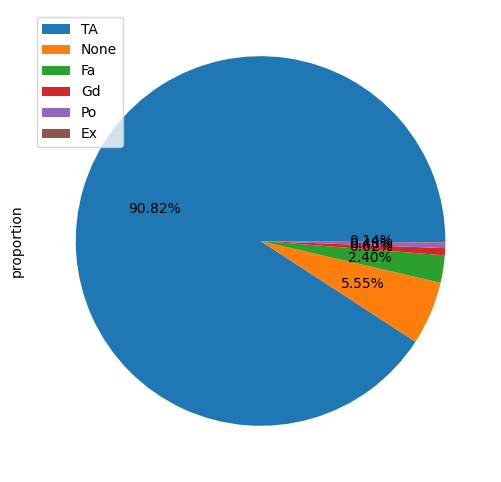

PavedDrive
Y    0.917808
N    0.061644
P    0.020548
Name: proportion, dtype: float64


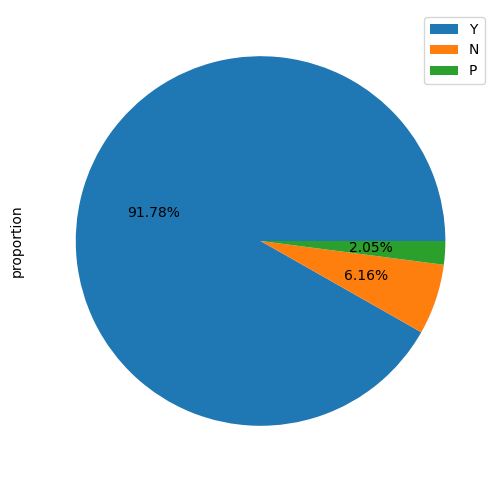

PoolQC
None    0.995205
Gd      0.002055
Ex      0.001370
Fa      0.001370
Name: proportion, dtype: float64


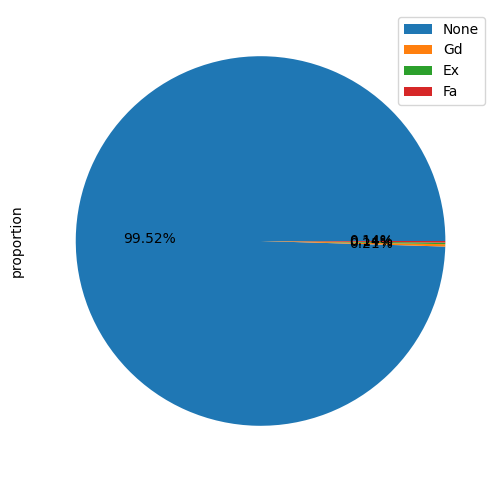

Fence
None     0.807534
MnPrv    0.107534
GdPrv    0.040411
GdWo     0.036986
MnWw     0.007534
Name: proportion, dtype: float64


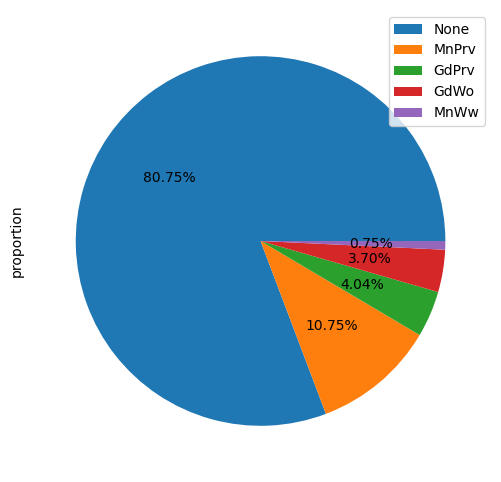

MiscFeature
None    0.963014
Shed    0.033562
Gar2    0.001370
Othr    0.001370
TenC    0.000685
Name: proportion, dtype: float64


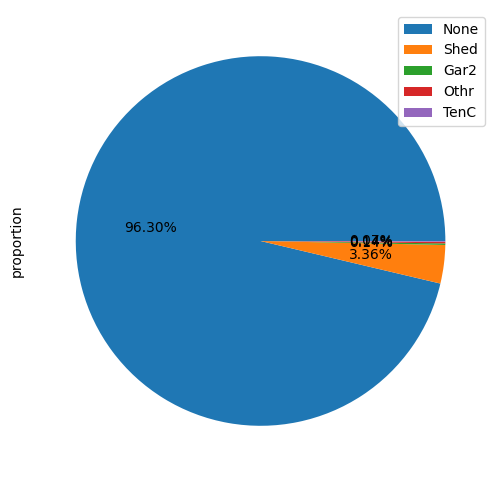

SaleType
WD       0.867808
New      0.083562
COD      0.029452
ConLD    0.006164
ConLI    0.003425
ConLw    0.003425
CWD      0.002740
Oth      0.002055
Con      0.001370
Name: proportion, dtype: float64


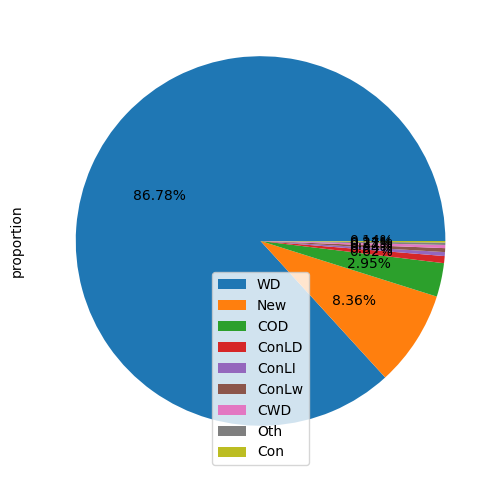

SaleCondition
Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: proportion, dtype: float64


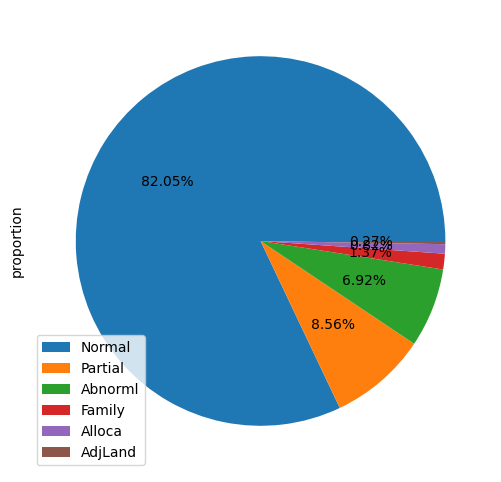

In [20]:
for i in cat_cols: 
    print(housing[i].value_counts(normalize=True)) 
    plt.figure(figsize=[6,6]) 
    housing[i].value_counts(normalize=True).plot.pie(labeldistance=None, autopct='%1.2f%%') 
    plt.legend() 
    plt.show()

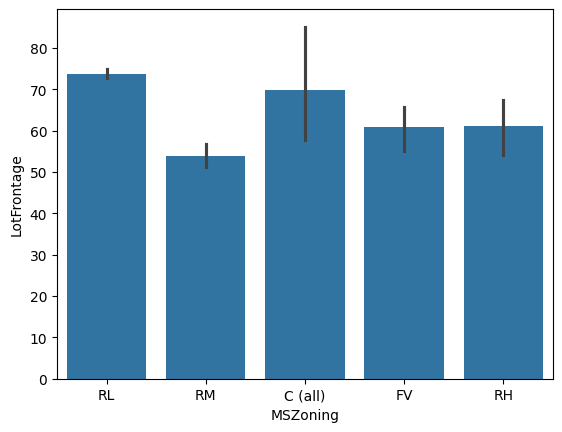

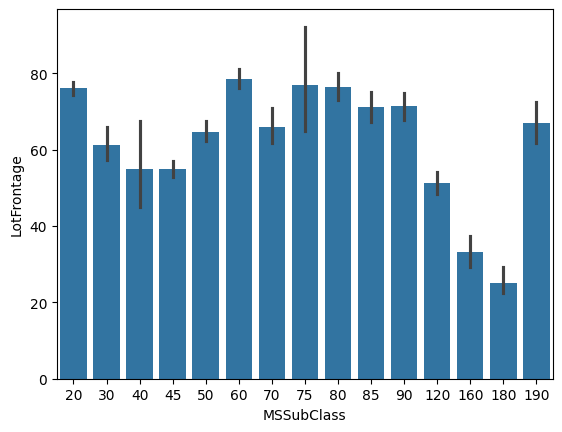

In [21]:
# Bivariate/ Multivariate Analysis on the Dataset 
sns.barplot(x='MSZoning', y='LotFrontage', data=housing) 
plt.show()
sns.barplot(x='MSSubClass', y='LotFrontage', 
data=housing) 
plt.show()

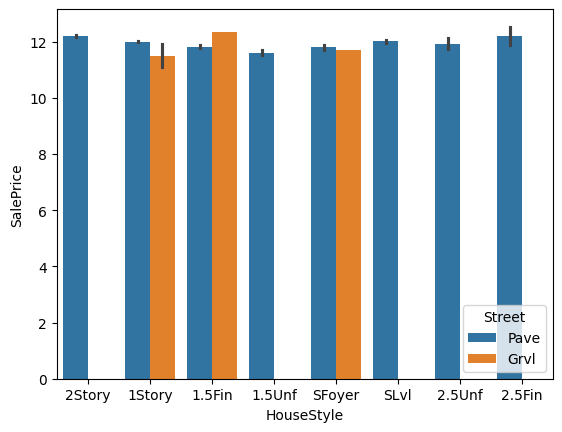

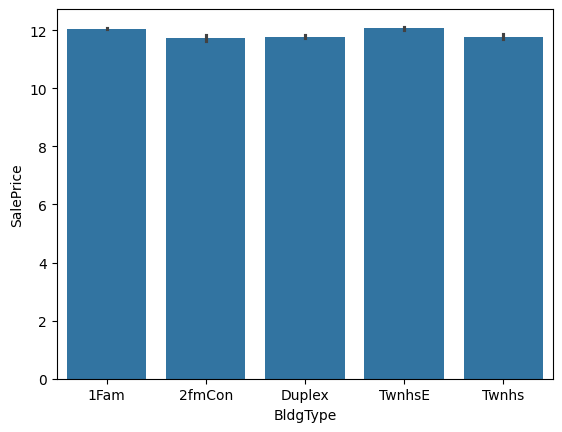

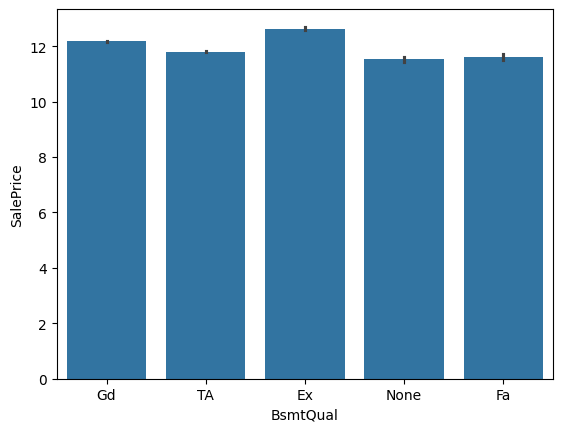

In [22]:
#plot of HouseStyle vs SalePrice based on Street 
sns.barplot(x='HouseStyle', y='SalePrice', hue='Street', 
data=housing) 
plt.show() 
sns.barplot(x='BldgType', y='SalePrice', data=housing) 
plt.show() 
sns.barplot(x='BsmtQual', y='SalePrice', data=housing) 
plt.show() 

In [23]:
#Calculating Age of Property  
housing["Age"] = housing["YrSold"]-housing["YearBuilt"] 
housing["Age"]

0        5
1       31
2        7
3       91
4        8
        ..
1455     8
1456    32
1457    69
1458    60
1459    43
Name: Age, Length: 1460, dtype: int64

In [24]:
#Dropping YrSold and YearBuilt 
housing.drop(columns=["YrSold","YearBuilt"], axis=1, inplace=True)

Text(0.5, 1.0, 'Correlation of Numeric Values')

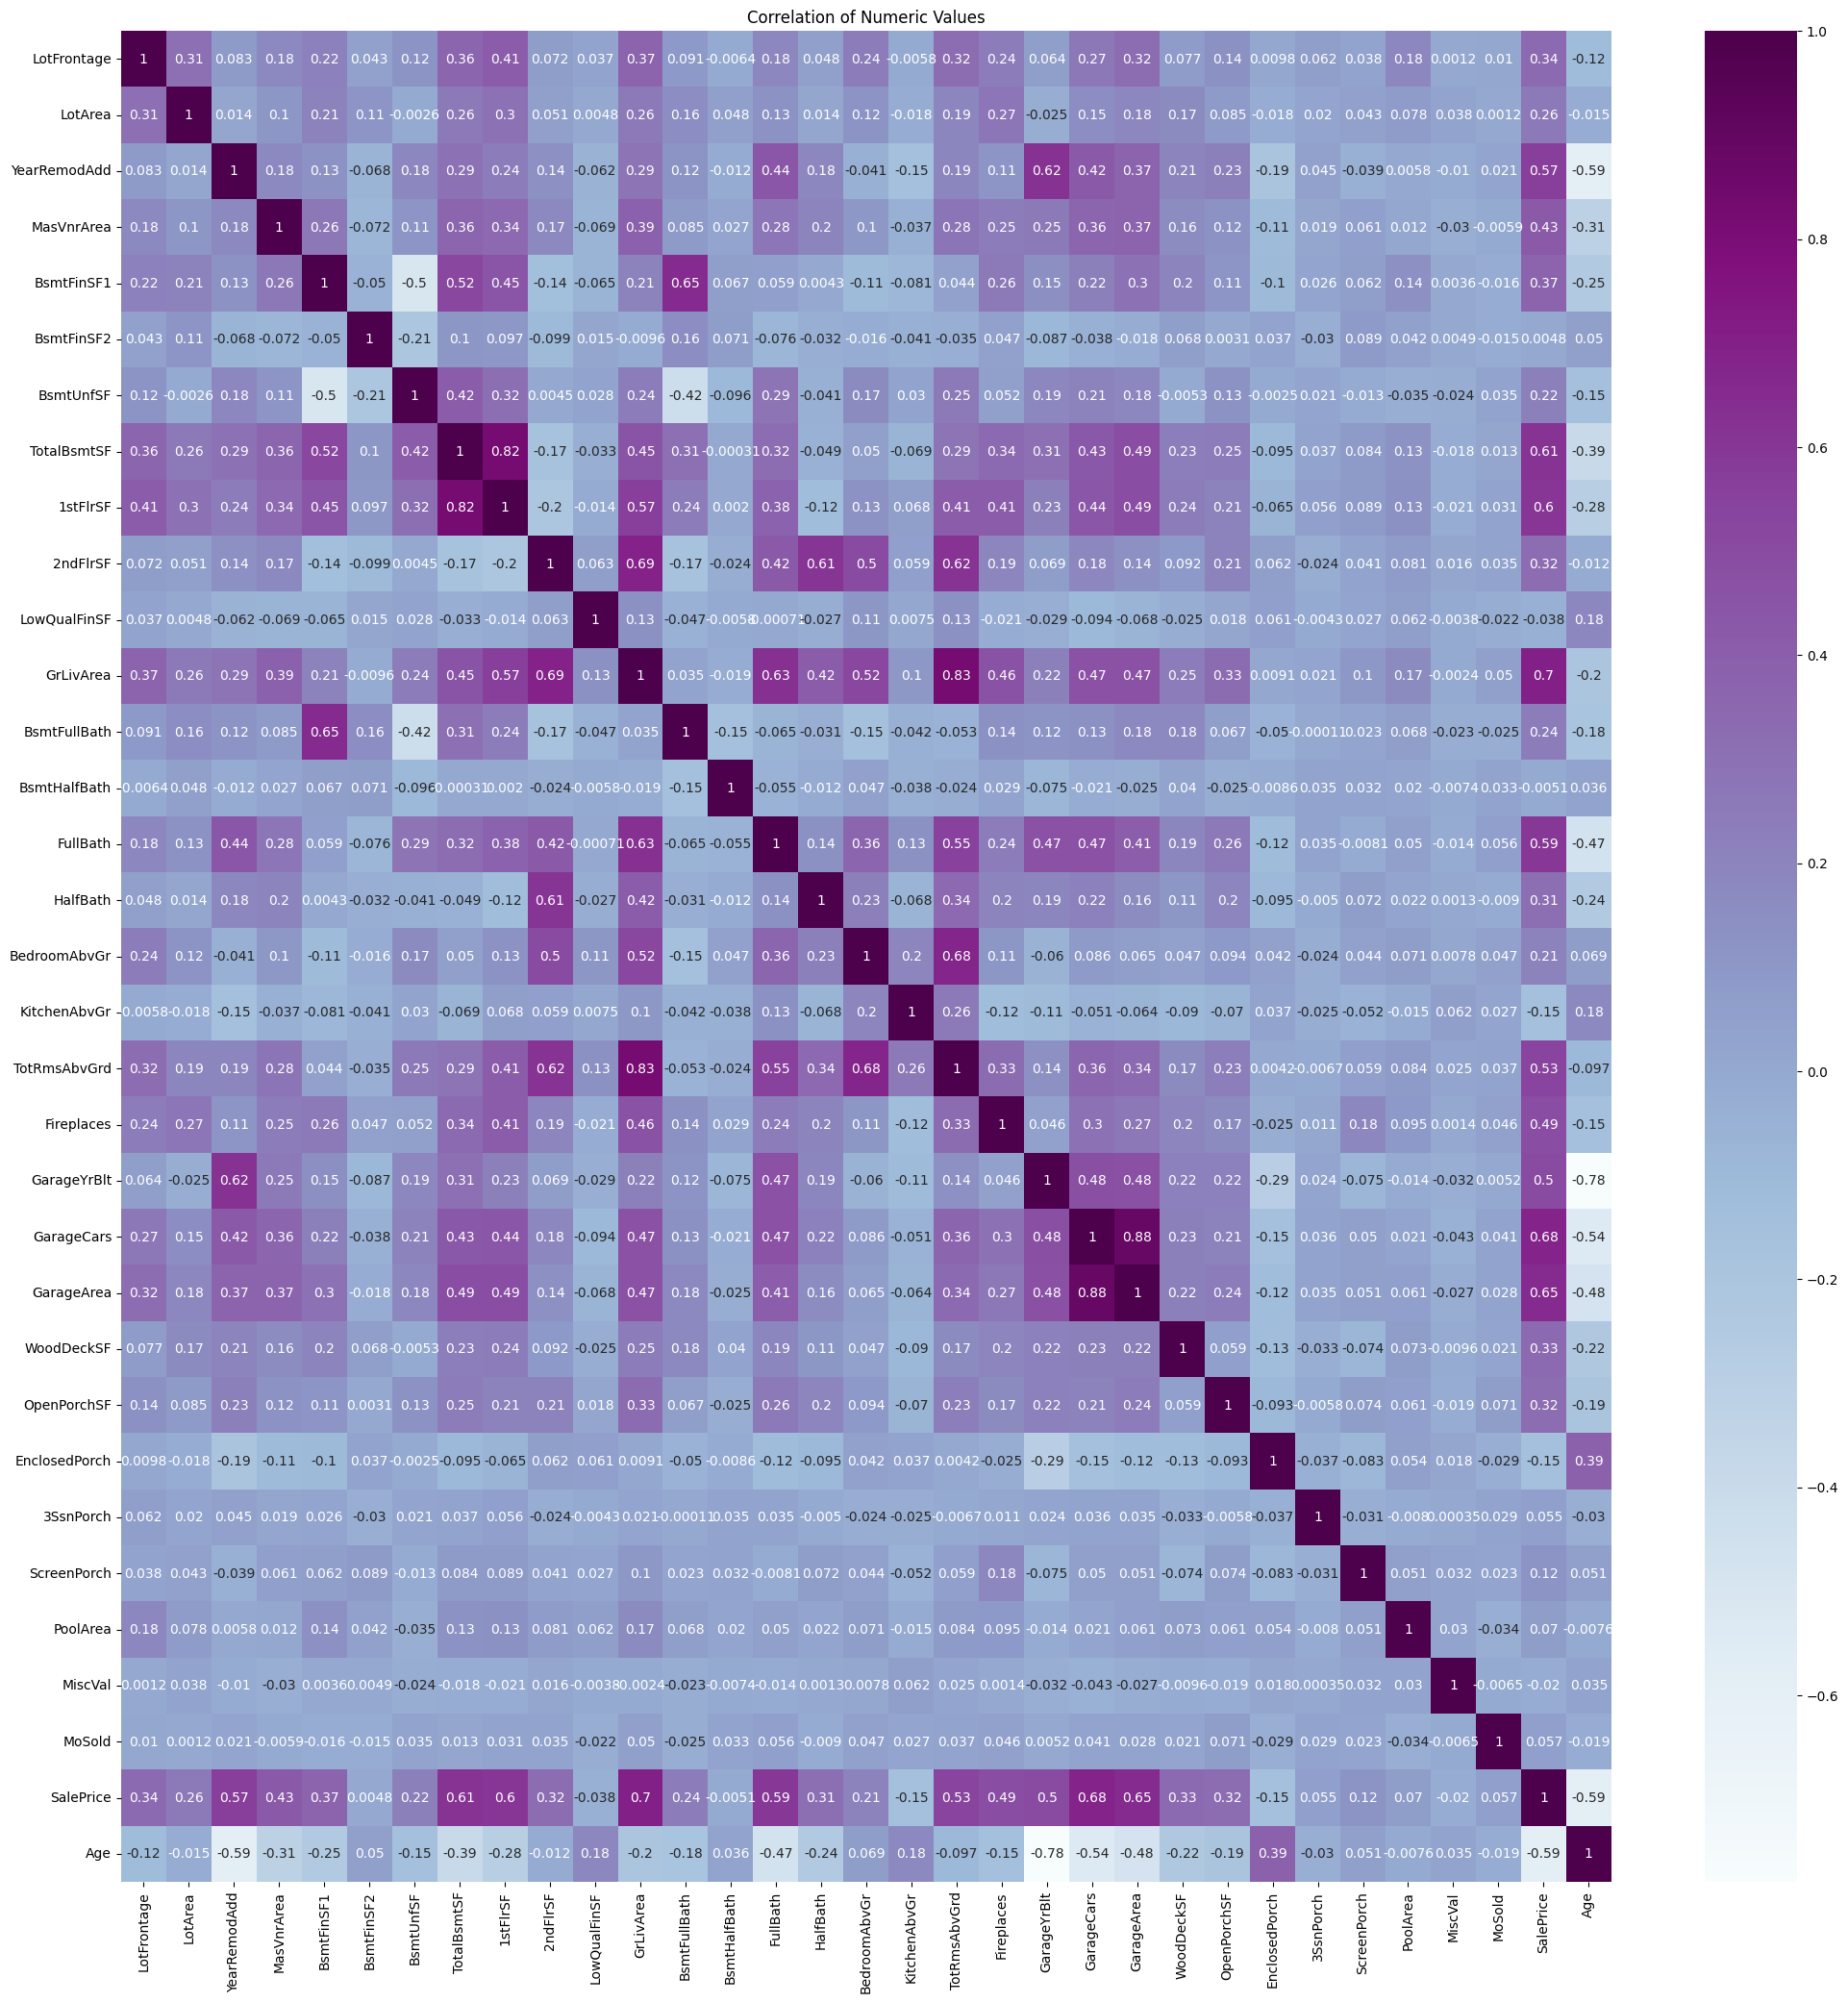

In [25]:
#Correlation between Numerical Columns 
plt.figure(figsize=[25,25]) 
sns.heatmap(housing.corr(numeric_only=True), annot=True, cmap='BuPu') 
plt.title("Correlation of Numeric Values")

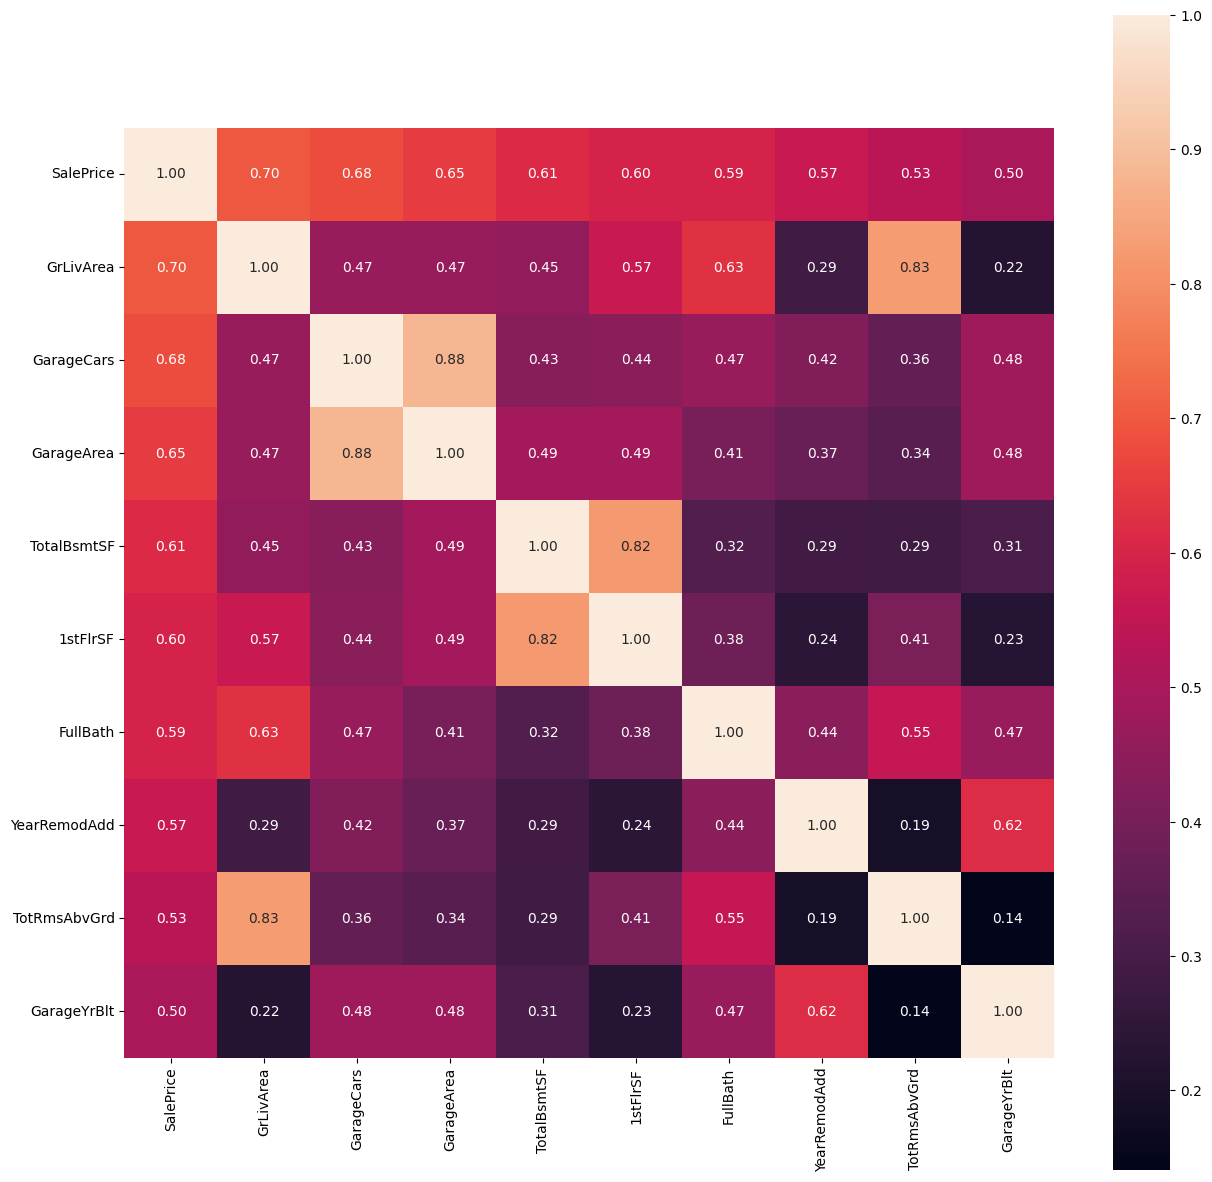

In [26]:
# For 10 largest data 
k=10 
plt.figure(figsize=[15,15]) 

cols = housing.corr(numeric_only=True).nlargest(k,"SalePrice").index 
cm = np.corrcoef(housing[cols].values.T) 

sns.heatmap(cm, annot=True, square=True, fmt='.2f', cbar=True, annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values) 
plt.show()

From the plot, we can observe that  
• GarageArea and GarageCars are highly correlated with coeff of 0.88 

• GarageYrBlt and TotRmsAbvGrd are least correlated with coeff of 0.14 

<Figure size 2000x2000 with 0 Axes>

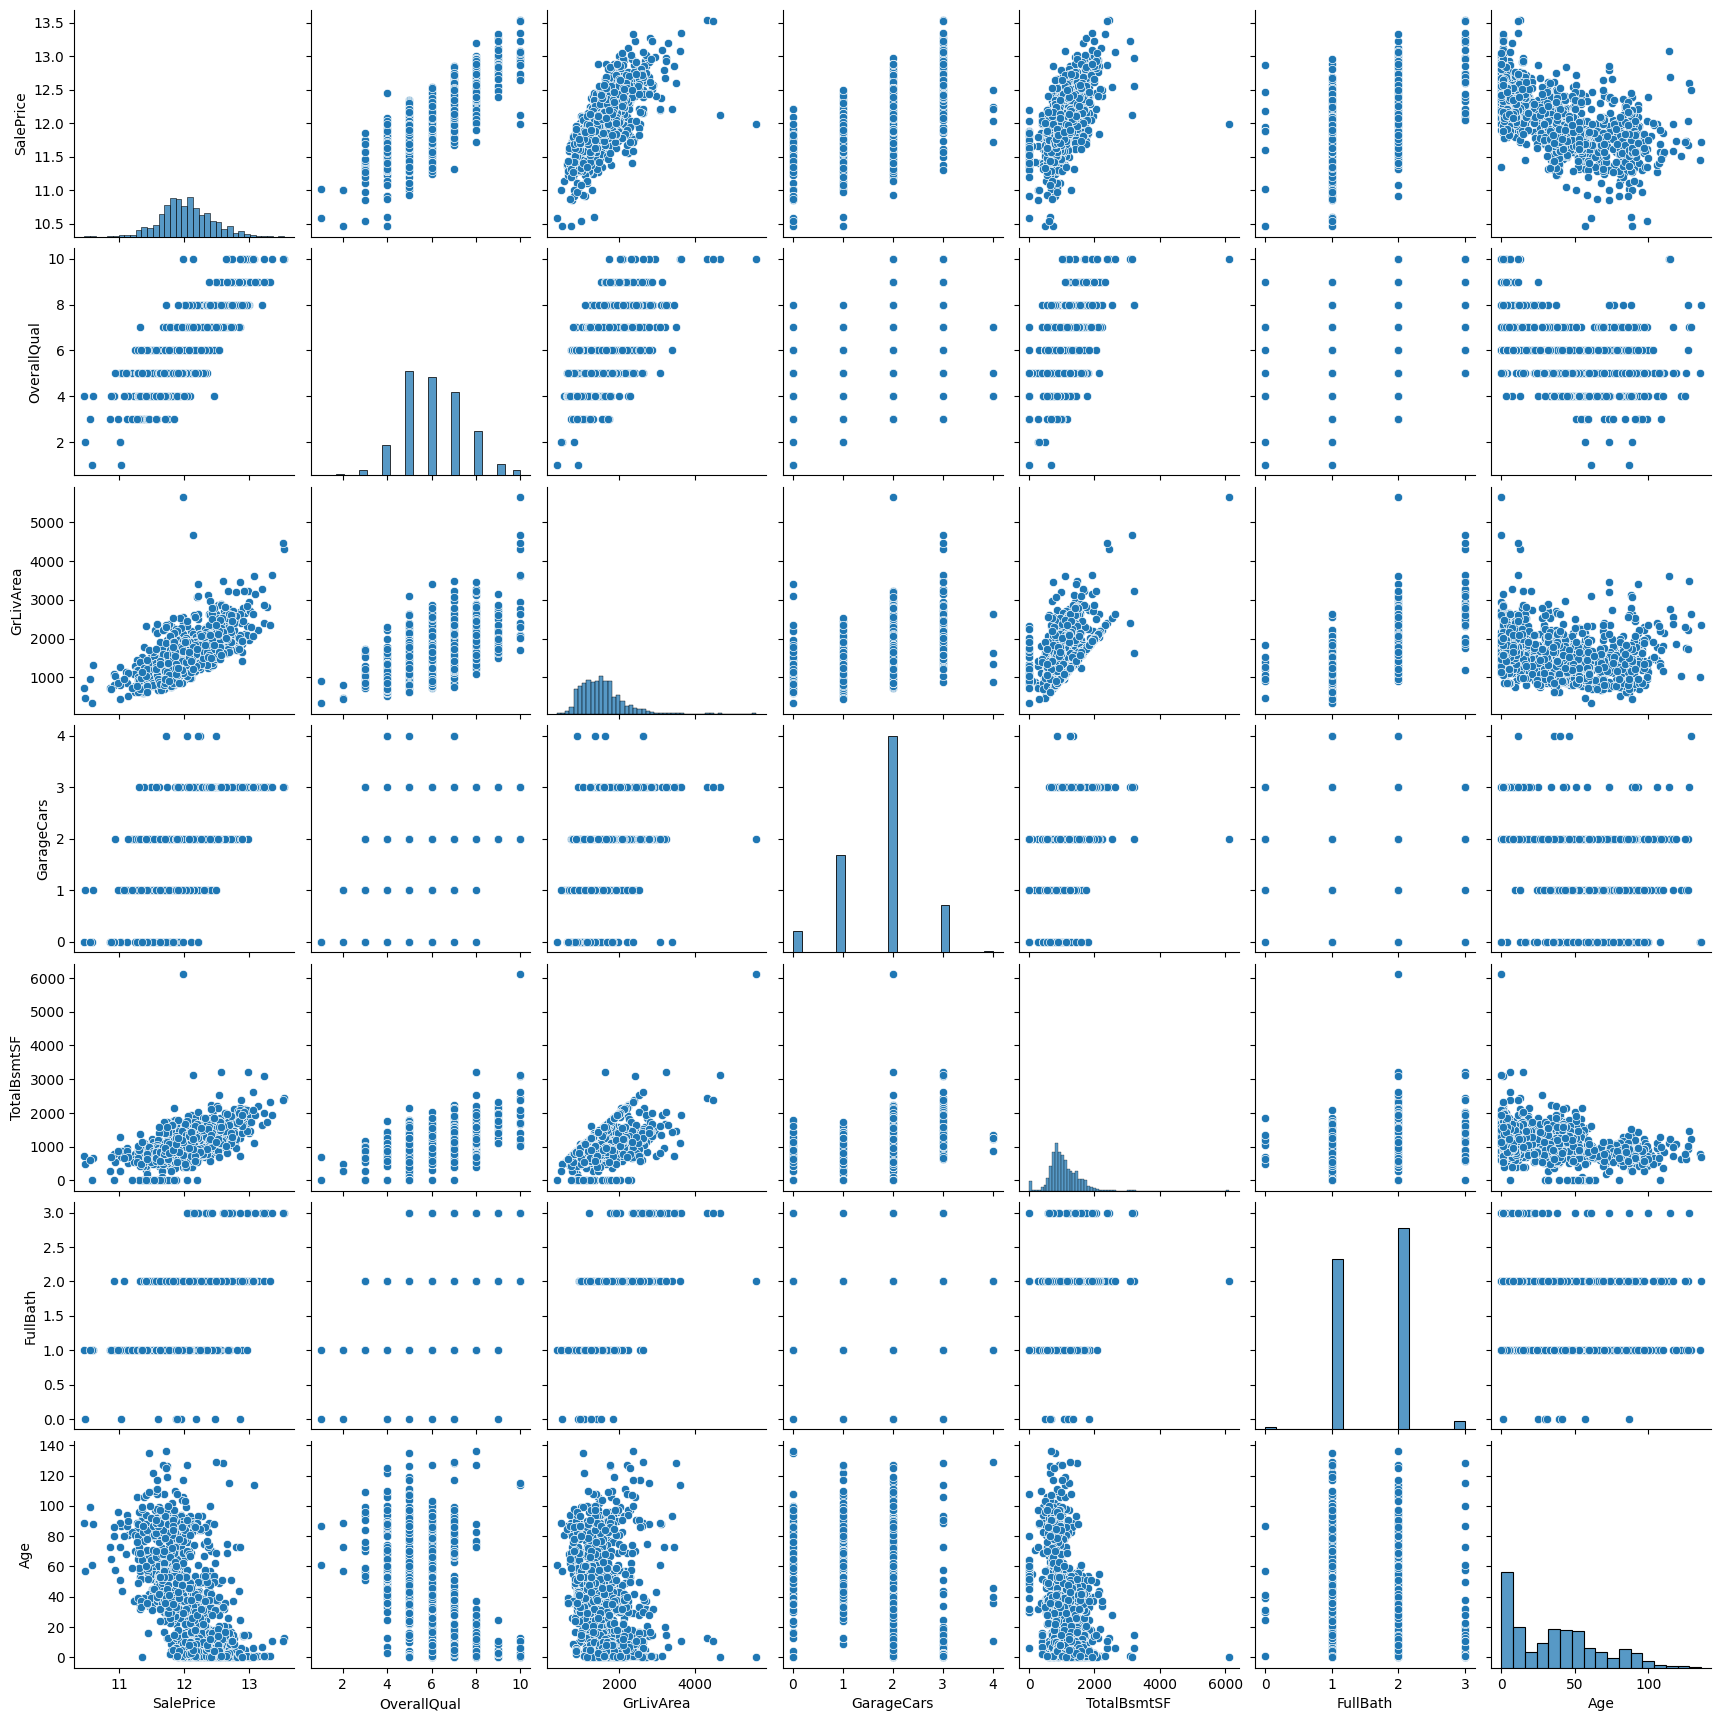

In [27]:
cols = ["SalePrice", "OverallQual","GrLivArea","GarageCars","TotalBsmtSF","FullBath","Age"] 
plt.figure(figsize=[20,20]) 
sns.pairplot(housing[cols]) 
plt.show()

From the above plot, we can see that Age has negative correlation with target variable SalePrice and TotalBsmtSF and GrLivArea have positive correlation with SalePrice 


Data Preparation


In [28]:
housing_num = housing.select_dtypes(include=['int64','float64']) 
len(housing_num)

1460

In [29]:
housing_cat = housing.select_dtypes(include='object') 
housing_cat 

MSSubClass MSZoning Street Alley LotShape LandContour Utilities  \
0            60       RL   Pave  None      Reg         Lvl    AllPub   
1            20       RL   Pave  None      Reg         Lvl    AllPub   
2            60       RL   Pave  None      IR1         Lvl    AllPub   
3            70       RL   Pave  None      IR1         Lvl    AllPub   
4            60       RL   Pave  None      IR1         Lvl    AllPub   
...         ...      ...    ...   ...      ...         ...       ...   
1455         60       RL   Pave  None      Reg         Lvl    AllPub   
1456         20       RL   Pave  None      Reg         Lvl    AllPub   
1457         70       RL   Pave  None      Reg         Lvl    AllPub   
1458         20       RL   Pave  None      Reg         Lvl    AllPub   
1459         20       RL   Pave  None      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood  ... GarageType GarageFinish GarageQual  \
0       Inside       Gtl      CollgCr  ...     Attchd          RFn         TA   
1          FR2       Gtl      Veenker  ...     Attchd          RFn         TA   
2       Inside       Gtl      CollgCr  ...     Attchd          RFn         TA   
3       Corner       Gtl      Crawfor  ...     Detchd          Unf         TA   
4          FR2       Gtl      NoRidge  ...     Attchd          RFn         TA   
...        ...       ...          ...  ...        ...          ...        ...   
1455    Inside       Gtl      Gilbert  ...     Attchd          RFn         TA   
1456    Inside       Gtl       NWAmes  ...     Attchd          Unf         TA   
1457    Inside       Gtl      Crawfor  ...     Attchd          RFn         TA   
1458    Inside       Gtl        NAmes  ...     Attchd          Unf         TA   
1459    Inside       Gtl      Edwards  ...     Attchd          Fin         TA   

     GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0            TA          Y   None   None        None       WD        Normal  
1            TA          Y   None   None        None       WD        Normal  
2            TA          Y   None   None        None       WD        Normal  
3            TA          Y   None   None        None       WD       Abnorml  
4            TA          Y   None   None        None       WD        Normal  
...         ...        ...    ...    ...         ...      ...           ...  
1455         TA          Y   None   None        None       WD        Normal  
1456         TA          Y   None  MnPrv        None       WD        Normal  
1457         TA          Y   None  GdPrv        Shed       WD        Normal  
1458         TA          Y   None   None        None       WD        Normal  
1459         TA          Y   None   None        None       WD        Normal  

[1460 rows x 46 columns]

In [30]:
housing_cat_dm = pd.get_dummies(housing_cat, drop_first=True)
housing_cat_dm

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0             False          False          False          False   
1             False          False          False          False   
2             False          False          False          False   
3             False          False          False          False   
4             False          False          False          False   
...             ...            ...            ...            ...   
1455          False          False          False          False   
1456          False          False          False          False   
1457          False          False          False          False   
1458          False          False          False          False   
1459          False          False          False          False   

      MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0              True          False          False          False   
1             False          False          False          False   
2              True          False          False          False   
3             False           True          False          False   
4              True          False          False          False   
...             ...            ...            ...            ...   
1455           True          False          False          False   
1456          False          False          False          False   
1457          False           True          False          False   
1458          False          False          False          False   
1459          False          False          False          False   

      MSSubClass_85  MSSubClass_90  ...  SaleType_ConLI  SaleType_ConLw  \
0             False          False  ...           False           False   
1             False          False  ...           False           False   
2             False          False  ...           False           False   
3             False          False  ...           False           False   
4             False          False  ...           False           False   
...             ...            ...  ...             ...             ...   
1455          False          False  ...           False           False   
1456          False          False  ...           False           False   
1457          False          False  ...           False           False   
1458          False          False  ...           False           False   
1459          False          False  ...           False           False   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0            False         False         True                  False   
1            False         False         True                  False   
2            False         False         True                  False   
3            False         False         True                  False   
4            False         False         True                  False   
...            ...           ...          ...                    ...   
1455         False         False         True                  False   
1456         False         False         True                  False   
1457         False         False         True                  False   
1458         False         False         True                  False   
1459         False         False         True                  False   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                    False                 False                  True   
1                    False                 False                  True   
2                    False                 False                  True   
3                    False                 False                 False   
4                    False                 False                  True   
...                    ...                   ...                   ...   
1455                 False                 False                  True   
1456          

In [31]:
house = pd.concat([housing_num, housing_cat_dm], axis=1)  # type: ignore
house.head() 

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0     8450          2003       196.0         706           0   
1         80.0     9600          1976         0.0         978           0   
2         68.0    11250          2002       162.0         486           0   
3         60.0     9550          1970         0.0         216           0   
4         84.0    14260          2000       350.0         655           0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  SaleType_ConLI  \
0        150          856       856       854  ...           False   
1        284         1262      1262         0  ...           False   
2        434          920       920       866  ...           False   
3        540          756       961       756  ...           False   
4        490         1145      1145      1053  ...           False   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           False         False         False         True   
1           False         False         False         True   
2           False         False         False         True   
3           False         False         False         True   
4           False         False         False         True   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                  False                 False                 False   
1                  False                 False                 False   
2                  False                 False                 False   
3                  False                 False                 False   
4                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                  False  
1                  True                  False  
2                  True                  False  
3                 False                  False  
4                  True                  False  

[5 rows x 285 columns]

In [32]:
x = house.drop(['SalePrice'], axis=1).copy()
x.head() 

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0     8450          2003       196.0         706           0   
1         80.0     9600          1976         0.0         978           0   
2         68.0    11250          2002       162.0         486           0   
3         60.0     9550          1970         0.0         216           0   
4         84.0    14260          2000       350.0         655           0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  SaleType_ConLI  \
0        150          856       856       854  ...           False   
1        284         1262      1262         0  ...           False   
2        434          920       920       866  ...           False   
3        540          756       961       756  ...           False   
4        490         1145      1145      1053  ...           False   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           False         False         False         True   
1           False         False         False         True   
2           False         False         False         True   
3           False         False         False         True   
4           False         False         False         True   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                  False                 False                 False   
1                  False                 False                 False   
2                  False                 False                 False   
3                  False                 False                 False   
4                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                  False  
1                  True                  False  
2                  True                  False  
3                 False                  False  
4                  True                  False  

[5 rows x 284 columns]

In [33]:
y = house["SalePrice"].copy() 
y.head() 

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state=42)

In [35]:
X_train.shape

(1095, 284)

In [36]:
X_test.shape

(365, 284)

In [37]:
Y_train.shape

(1095,)

In [38]:
Y_test.shape

(365,)

In [39]:
num_cols = list(X_train.select_dtypes(include=['int64']))
len(num_cols)

29

In [40]:
from sklearn.metrics import mean_squared_error

scaler = StandardScaler() 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols]) 
X_test[num_cols] = scaler.fit_transform(X_test[num_cols]) 

def eval_metrics(Y_train, Y_train_pred, Y_test, Y_pred): 
    
    #r2 values for train and test data 
    print("r2 score (train) = ", '%.2f' %r2_score(Y_train, Y_train_pred)) 
    print("r2 score (test) = ", '%.2f' %r2_score(Y_test, Y_pred)) 
    
    # RMSE for train and test data 
    mse_train = mean_squared_error(Y_train, Y_train_pred) 
    mse_test = mean_squared_error(Y_test, Y_pred) 
    rmse_train = mse_train**0.5 
    rmse_test = mse_test**0.5 
    
    print ("RMSE(Train) = ", "%.2f" % rmse_train) 
    print ("RMSE(Test) = ", "%.2f" % rmse_test)

Build the ML model 

In [41]:
#Applying Ridge regressing with hyperparameter 'Lambda' 

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50, 100, 500, 1000]} 
ridge = Ridge() 
ridgeCV = GridSearchCV(estimator=ridge, param_grid=params, scoring='neg_mean_absolute_error', cv=5, return_train_score=True, verbose=1, n_jobs=-1) 
ridgeCV.fit(X_train[num_cols],Y_train)



Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [42]:
# Ridge Score 
print(ridgeCV.best_score_ )
print(ridgeCV.best_params_ )

-0.12028059388306622
{'alpha': 100}


In [43]:
ridge = Ridge(alpha=100) 
ridge.fit(X_train[num_cols], Y_train) 

Y_train_pred = ridge.predict(X_train[num_cols]) 
Y_pred = ridge.predict(X_test[num_cols]) 

eval_metrics(Y_train, Y_train_pred, Y_test, Y_pred) 
ridgeCV_res = pd.DataFrame(ridgeCV.cv_results_) 
ridgeCV_res.head() 

r2 score (train) =  0.81
r2 score (test) =  0.83
RMSE(Train) =  0.17
RMSE(Test) =  0.17


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.007221      0.002194         0.002291        0.001460      0.0001   
1       0.007052      0.001041         0.004294        0.003527       0.001   
2       0.005959      0.000983         0.002320        0.000824        0.01   
3       0.004308      0.001505         0.005572        0.002658        0.05   
4       0.006024      0.003000         0.004399        0.002095         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.120426          -0.135417          -0.124249   
1   {'alpha': 0.001}          -0.120426          -0.135417          -0.124249   
2    {'alpha': 0.01}          -0.120426          -0.135416          -0.124248   
3    {'alpha': 0.05}          -0.120425          -0.135415          -0.124248   
4     {'alpha': 0.1}          -0.120424          -0.135412          -0.124247   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.110908  ...        -0.121904        0.008033               26   
1          -0.110908  ...        -0.121904        0.008033               25   
2          -0.110908  ...        -0.121904        0.008033               24   
3          -0.110906  ...        -0.121902        0.008033               23   
4          -0.110904  ...        -0.121901        0.008033               22   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.117906           -0.101739           -0.114966   
1           -0.117906           -0.101739           -0.114966   
2           -0.117906           -0.101739           -0.114966   
3           -0.117905           -0.101739           -0.114966   
4           -0.117904           -0.101739           -0.114965   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.118992           -0.117138         -0.114148         0.006343  
1           -0.118992           -0.117138         -0.114148         0.006343  
2           -0.118991           -0.117138         -0.114148         0.006343  
3           -0.118991           -0.117137         -0.114147         0.006343  
4           -0.118990           -0.117136         -0.114147         0.006343  

[5 rows x 21 columns]

In [44]:
# Plotting R2_score vs alpha on log scale for train and test data using Ridge Regression 

plt.plot(ridgeCV_res['param_alpha'], ridgeCV_res['mean_train_score'], label='train')  # type: ignore
plt.plot(ridgeCV_res['param_alpha'], ridgeCV_res['mean_test_score'], label='test')  # type: ignore
plt.xlabel('alpha') 
plt.ylabel('R2_score') 
plt.xscale('log') 
plt.legend() 
plt.show()

In [45]:
#Applying Lasso regressing with hyperparameter 'Lambda' 

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50, 100, 500, 1000]} 
lasso = Lasso() 
lassoCV = GridSearchCV(estimator=lasso, 
param_grid=params, scoring='neg_mean_absolute_error', cv=5, return_train_score=True, verbose=1, n_jobs=-1) 
lassoCV.fit(X_train[num_cols], Y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [46]:
lassoCV.best_params_

{'alpha': 0.001}

In [47]:
lasso = Lasso(alpha=0.001) 
lasso.fit(X_train, Y_train) 

Y_train_pred1 = lasso.predict(X_train) 
Y_pred1 = lasso.predict(X_test) 

eval_metrics(Y_train, Y_train_pred1, Y_test, Y_pred1) 

lassoCV_res = pd.DataFrame(lassoCV.cv_results_) 
lassoCV_res.head() 

r2 score (train) =  0.90
r2 score (test) =  0.88
RMSE(Train) =  0.12
RMSE(Test) =  0.14


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.01515      0.002304         0.002671        0.000493      0.0001   
1        0.00754      0.000865         0.002452        0.000516       0.001   
2        0.00393      0.002721         0.000938        0.001060        0.01   
3        0.00549      0.002181         0.002147        0.000852        0.05   
4        0.00345      0.001973         0.002489        0.002201         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.120352          -0.135404          -0.124285   
1   {'alpha': 0.001}          -0.119692          -0.135206          -0.124549   
2    {'alpha': 0.01}          -0.120203          -0.134272          -0.127867   
3    {'alpha': 0.05}          -0.138705          -0.144283          -0.157559   
4     {'alpha': 0.1}          -0.169764          -0.168776          -0.202126   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.110878  ...        -0.121887        0.008042                2   
1          -0.110648  ...        -0.121679        0.008103                1   
2          -0.111839  ...        -0.122053        0.008080                3   
3          -0.132001  ...        -0.139139        0.011599                4   
4          -0.165013  ...        -0.171809        0.016240                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.117902           -0.101729           -0.114973   
1           -0.117869           -0.101749           -0.115112   
2           -0.120091           -0.103892           -0.118479   
3           -0.139552           -0.121514           -0.138810   
4           -0.173807           -0.156445           -0.173544   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.118981           -0.117125         -0.114142         0.006344  
1           -0.119001           -0.117042         -0.114155         0.006331  
2           -0.121967           -0.119070         -0.116700         0.006513  
3           -0.139730           -0.140771         -0.136075         0.007307  
4           -0.171690           -0.172141         -0.169525         0.006590  

[5 rows x 21 columns]

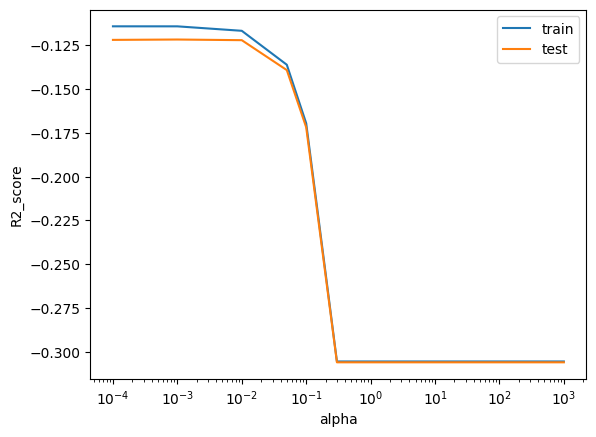

In [48]:
# Plotting R2_score vs alpha on log scale for train and test data using Lasso Regression 

plt.plot(lassoCV_res['param_alpha'], lassoCV_res['mean_train_score'], label='train') 
plt.plot(lassoCV_res['param_alpha'], lassoCV_res['mean_test_score'], label='test') 
plt.xlabel('alpha') 
plt.ylabel('R2_score') 
plt.xscale('log') 
plt.legend() 
plt.show()

Evaluating ML Model

In [49]:
len(X_train[num_cols].columns)
ridge.coef_.mean()

0.015341325249383406

In [50]:
# Convert columns to dataframe as betas 
betas1 = pd.DataFrame(index=x.columns) 
betas1.rows = x.columns
betas1['Lasso'] = lasso.coef_
betas1

Lasso
LotFrontage           -0.000559
LotArea                0.014725
YearRemodAdd           0.033580
MasVnrArea            -0.000002
BsmtFinSF1            -0.000000
...                         ...
SaleCondition_AdjLand  0.000000
SaleCondition_Alloca   0.000000
SaleCondition_Family  -0.000000
SaleCondition_Normal   0.017023
SaleCondition_Partial  0.045462

[284 rows x 1 columns]

In [51]:
betas2 = pd.DataFrame(index=X_train[num_cols].columns) 
betas2.rows = X_train[num_cols].columns
betas2['Ridge'] = ridge.coef_
betas2


Ridge
LotArea        0.012667
YearRemodAdd   0.062287
BsmtFinSF1     0.017977
BsmtFinSF2     0.004226
BsmtUnfSF      0.014116
TotalBsmtSF    0.034157
1stFlrSF       0.034733
2ndFlrSF       0.032402
LowQualFinSF   0.000787
GrLivArea      0.052654
BsmtFullBath   0.030644
BsmtHalfBath   0.004149
FullBath       0.027479
HalfBath       0.016200
BedroomAbvGr  -0.001516
KitchenAbvGr  -0.041489
TotRmsAbvGrd   0.039238
Fireplaces     0.046206
GarageCars     0.060459
GarageArea     0.025868
WoodDeckSF     0.016200
OpenPorchSF   -0.001957
EnclosedPorch  0.006704
3SsnPorch      0.009808
ScreenPorch    0.020268
PoolArea      -0.016838
MiscVal       -0.005887
MoSold         0.007621
Age           -0.064264

In [52]:
#View the features removed by Lasso 
lasso_cols_removed = list(betas1[betas1['Lasso']==0].index) 
print(lasso_cols_removed) 
print(len(lasso_cols_removed)) 

['BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'OpenPorchSF', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'Street_Pave', 'Alley_None', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Low', 'Utilities_NoSeWa', 'LotConfig_FR2', 'LotConfig_FR3', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_CollgCr', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Co

In [53]:
betas2['Ridge'].sort_values(ascending=False)[:10] 

YearRemodAdd    0.062287
GarageCars      0.060459
GrLivArea       0.052654
Fireplaces      0.046206
TotRmsAbvGrd    0.039238
1stFlrSF        0.034733
TotalBsmtSF     0.034157
2ndFlrSF        0.032402
BsmtFullBath    0.030644
FullBath        0.027479
Name: Ridge, dtype: float64

In [54]:
ridge_coeffs = np.exp(betas2['Ridge']) 
ridge_coeffs.sort_values(ascending=False)[:10] 

YearRemodAdd    1.064267
GarageCars      1.062324
GrLivArea       1.054065
Fireplaces      1.047290
TotRmsAbvGrd    1.040018
1stFlrSF        1.035344
TotalBsmtSF     1.034747
2ndFlrSF        1.032932
BsmtFullBath    1.031118
FullBath        1.027860
Name: Ridge, dtype: float64

In [55]:
betas1['Lasso'].sort_values(ascending=False)[:10] 

OverallQual_9           0.176677
GrLivArea               0.117588
Neighborhood_Crawfor    0.102686
OverallQual_8           0.101587
Neighborhood_StoneBr    0.085286
Exterior1st_BrkFace     0.082666
Neighborhood_NridgHt    0.082595
Functional_Typ          0.074803
CentralAir_Y            0.072873
BsmtCond_TA             0.062840
Name: Lasso, dtype: float64